# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Summary

# Actionable Insights and Recommendations for INN Hotels
## Cancellation and Refund Policy Optimizationon

### 1. Introduce Non-Refundable Booking Options
- Guests booking early (`lead_time`) and through `Online` channels are more likely to cancel.
- **Offer discounted non-refundable rates** to secure revenue upfront and reduce cancellation risk.

### 2. Flexible Refunds for Short Lead Time Bookings
- Guests with shorter `lead_time` have lower cancellation probability.
- **Allow full or partial refunds** for bookings made less than 15 days i

### 3. Monitor and Encourage Special Requests

- Guests with **0–2 special requests** show a **higher likelihood of cancellation**, especially those with zero requests (over 40% cancellation rate).
- Conversely, guests with **3 or more requests almost never cancel**.
- **Recommendation**: 
  - Encourage guests to submit special requests during booking (e.g., preferences for room setup, amenities).
  - Use the number of requests as a **positive signal of booking commitment** rather than a cancellation risk.
  - Avoid penalizing or flagging high-request bookings—they are highly likely to show up.iple 

## Other Strategic Recommendationsic Recommendations

### 4. Optimize Online Booking Channels
- `market_segment_type_Online` is a strong predictor of cancellations.
- **Encourage direct bookings** by:
  - Offering exclusive perks or discounts via the hotel’s website.
  - Displaying clear cancellation policies during checkout.

### 5. Dynamic Pricing for High-Risk Segments
- Long `lead_time`, no `parking`, and low `avg_price_per_room` correlate with higher cancellation risk.
- **Raise prices or require partial prepayment** for bookings matching this profile.

### 6. Targeted Offers for Reliable Segments
- Guests with short `lead_time` and fewer requests are more likely to show up.
- **Incentivize** these custo
## Model Insights
- **Pre-Pruned Decision Tree** performed best: F1 train - 0.758779, F1 test - 0.754676	
- **Post-Pruned Decision Tree** model looks overfitted: F1 train - 0.913977, F1 test - 0.814270

- **Top Features Contributing to Predictions**:
  1. `lead_time`
  2. `market_segment_type_Online`
  3. `no_of_special_requests`
  4. `avg_price_per_room` should inform policy design and marketing strategy.




## Importing necessary libraries and data

In [3]:
# Installing the libraries with the specified version.
#!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [5]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
    roc_auc_score,
roc_curve,
precision_recall_curve
)

In [6]:
#from sklearn.metrics import plot_confusion_matrix

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [8]:
data = pd.read_csv("INNHotelsGroup.csv")


'''from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Austin/2.5 Project Supervised Learning - Classification INN Hotels/INNHotelsGroup.csv'
data = pd.read_csv(file_path)'''

"from google.colab import drive\ndrive.mount('/content/drive')\nfile_path = '/content/drive/MyDrive/Austin/2.5 Project Supervised Learning - Classification INN Hotels/INNHotelsGroup.csv'\ndata = pd.read_csv(file_path)"

In [9]:
# copying data to another varaible to avoid any changes to original data
df = data.copy()

## Data Overview

- Observations
- Sanity checks

### View the first and last 5 rows of the dataset.

In [12]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [13]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


### Understand the shape of the dataset.

In [15]:
df.shape

(36275, 19)

* The dataset has 36275 rows and 19 columns of data

### Check the data types of the columns for the dataset.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

**Observations -**
* a lot of columns' type  - integer.
* Booking_ID - object - don't need it 

### Summary of the dataset.

In [21]:
df.describe(include="all")

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275
unique,36275,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,2
top,INN00001,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,27835,NaN,28130,NaN,NaN,NaN,NaN,23214,NaN,NaN,NaN,NaN,NaN,24390
mean,NaN,1.844962,0.105279,0.810724,2.204300,NaN,0.030986,NaN,85.232557,2017.820427,7.423653,15.596995,NaN,0.025637,0.023349,0.153411,103.423539,0.619655,NaN
std,NaN,0.518715,0.402648,0.870644,1.410905,NaN,0.173281,NaN,85.930817,0.383836,3.069894,8.740447,NaN,0.158053,0.368331,1.754171,35.089424,0.786236,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,17.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,80.300000,0.000000,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,57.000000,2018.000000,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,99.450000,0.000000,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,126.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,120.000000,1.000000,NaN


### Observations

**Adults per booking**:
* Mean: ~1.84 adults
* Most bookings are for 2 adults (25%, 50%, 75% quantiles = 2)
* Maximum: 4 adults

**Children per booking:**
* Mean: ~0.1 → most bookings are without children
* Max: 10 children (likely an outlier)

**Stay Details**<br>
Weekend nights:
* Most bookings have 0–2 weekend nights (median = 1)<br>

Weekday nights:
* Median stay = 2 nights, max = 17 nights<br>

Lead time:
* Mean lead time before arrival: ~85 days
* Max lead time: 443 days, suggesting bookings were made far in advance

**Meal Plans**
* 4 types of type_of_meal_plan
* Most popular: Meal Plan 1 (used in ~27,835 bookings)

**Car Parking**
* Only ~3% of bookings requested a parking space (mean = 0.030)

**Room Type**
* 7 types of room_type_reserved
* Most frequent: Room_Type 1 (≈ 28,130 bookings)

**Date of Arrival**
* All bookings are from 2017 or 2018
* Median month: August
* Most arrival dates cluster around the middle of the month (median = 16)

**Market Segment**
* 5 market segment types
* Most common: Online (~23,214 bookings)

**Repeat Guests**
* Very few are repeat guests (mean ≈ 0.026, i.e. ~2.6%)

**Cancellations**
* Most guests had no prior cancellations:
* Previous cancellations:
Median: 0, Max: 13
* Previous bookings not canceled:
Median: 0, Max: 58

**Price and Requests**
* Average room price: 103.42
* Max room price: 540<br>
Special requests:
* Most bookings had 0–1 requests
* Max: 5 requests

**Booking Status**
* Two classes: Canceled and Not_Canceled
* Most bookings were not canceled (Not_Canceled = ~24,390)

In [23]:
# checking for unique values in ID column
df["Booking_ID"].nunique()

36275

* Since all the values in Booking_ID column are unique we can drop it

In [25]:
df.drop(["Booking_ID"], axis=1, inplace=True)

### Check for missing values

In [27]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

* There are no missing values in the dataset

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

**The below functions need to be defined to carry out the EDA.**

In [32]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [33]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [34]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [35]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

#### Observations on no_of_adults 

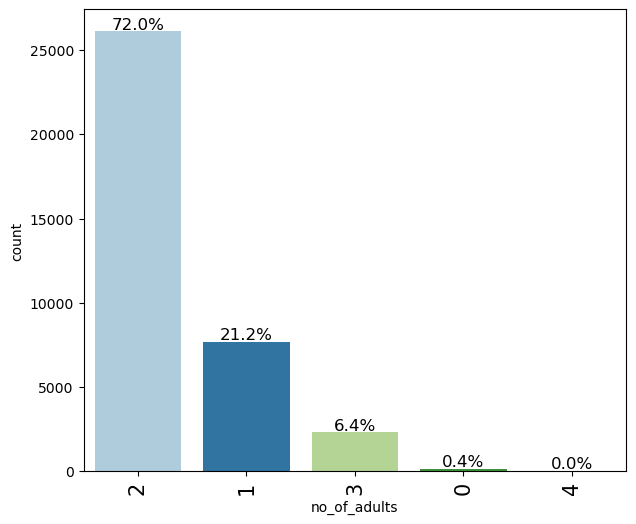

In [38]:
labeled_barplot(df, "no_of_adults", perc=True)

* The majority of entries (72.0%) have 2 adults.
* 1 adult is recorded in 21.2% of the cases.
* Entries with 0 adults 0.4% may need further investigation for validity or special cases (e.g., placeholder or missing data).

#### Observations on no_of_children  

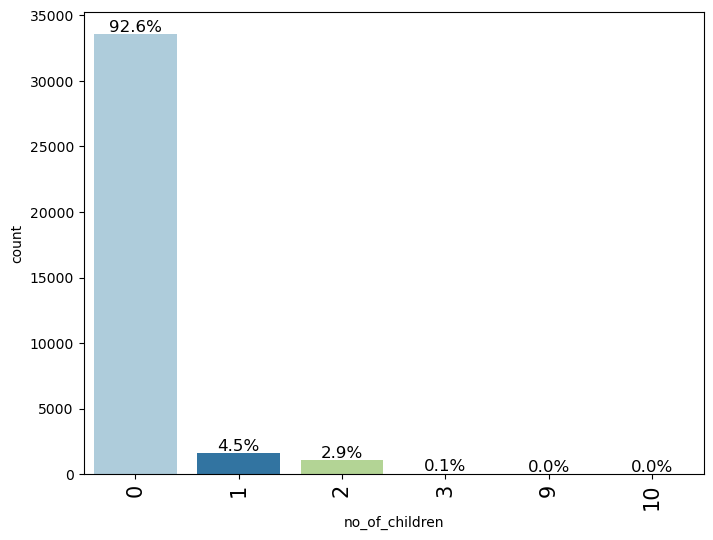

In [41]:
labeled_barplot(df, "no_of_children", perc=True)

* 92.3% of bookings without children
* 9 & 10 looks like outliers

#### Observations on no_of_weekend_nights 

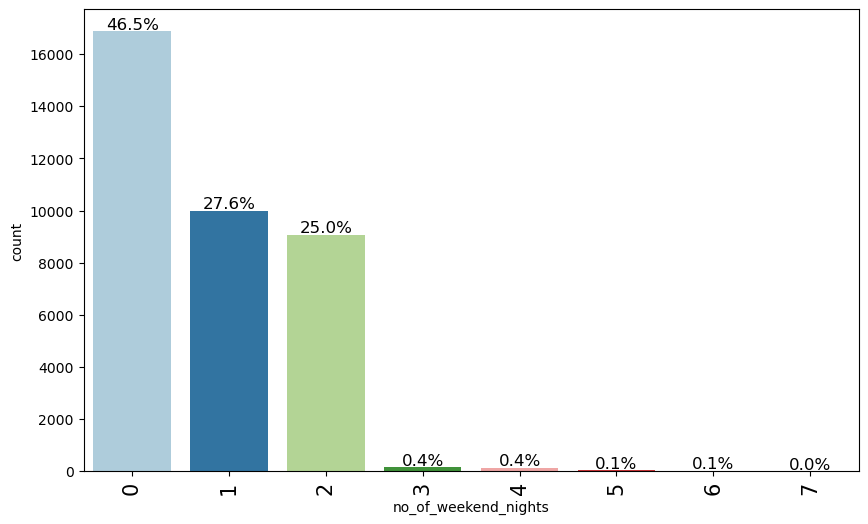

In [44]:
labeled_barplot(df, "no_of_weekend_nights", perc=True)

* 0 weekend nights: 46.5%
* 1 night: 27.6%
* 2 nights: 25.0%

Almost half of bookings are for weekday-only stays (0 weekend nights), which could imply:
- Business travelers
- Budget-conscious guests avoiding higher weekend rates

#### Observations on no_of_week_nights   

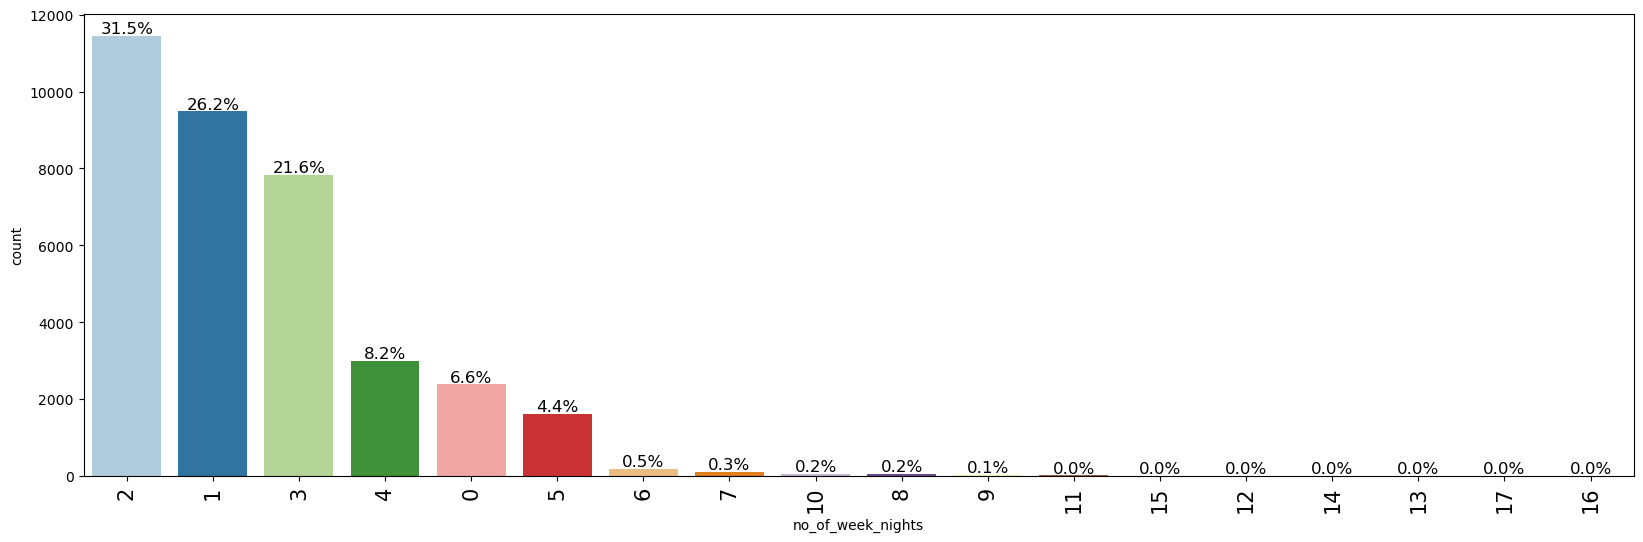

In [47]:
labeled_barplot(df, "no_of_week_nights", perc=True)

Most frequent value:
- 2 nights is the most common, accounting for 31.5% of the data.
- 1 night: 26.2%
- 3 nights: 21.6%

These three values (1–3 nights) together account for over 79% of the observations

#### Observations on type_of_meal_plan  

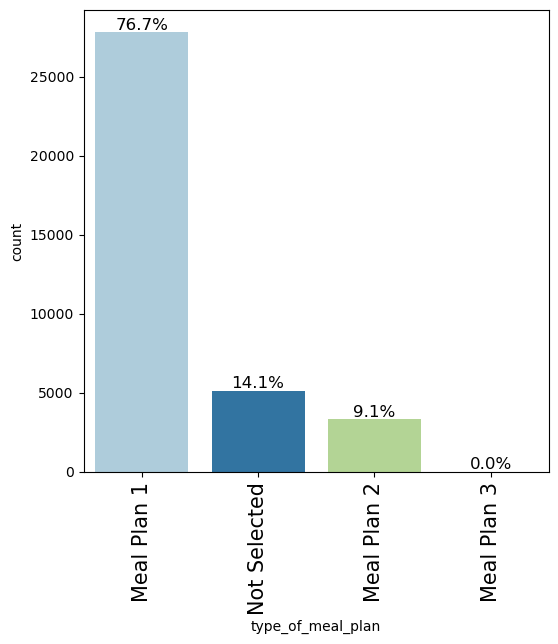

In [50]:
labeled_barplot(df, "type_of_meal_plan", perc=True)

* Meal Plan 1 is by far the most common choice, selected by 76.7% of customers.
* Not Selected accounts for 14.1%, indicating a notable portion of customers did not opt into a meal plan.
* Meal Plan 2 was selected by 9.1% of customers.
* Meal Plan 3 has 0.0%, suggesting it is either deprecated, unavailable, or possibly an erroneous category.

Meal Plan 1 likely represents the default or most cost-effective option.
The "Not Selected" category may require further analysis to understand if this group correlates with specific booking behaviors or customer profiles.
If Meal Plan 3 probably is invalid or unused

#### Observations on required_car_parking_space

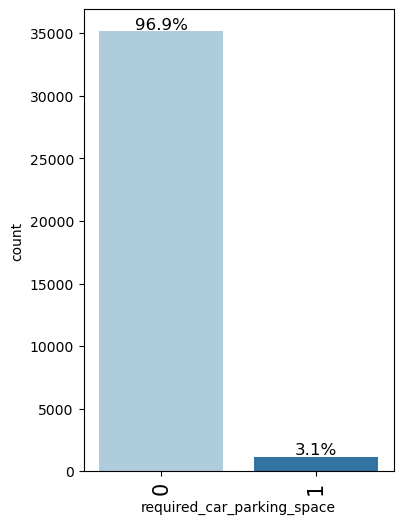

In [53]:
labeled_barplot(df, "required_car_parking_space", perc=True)

- 96.9% of customers did not require a car parking space (0).
- Only 3.1% of customers requested a car parking space (1).

The demand for parking space is very low. This may suggest:
- Most customers might not be traveling by car.
- The target audience could be urban-based or traveling by public transportation.

Parking space availability may not be a significant factor in customer decisions.

#### Observations on room_type_reserved

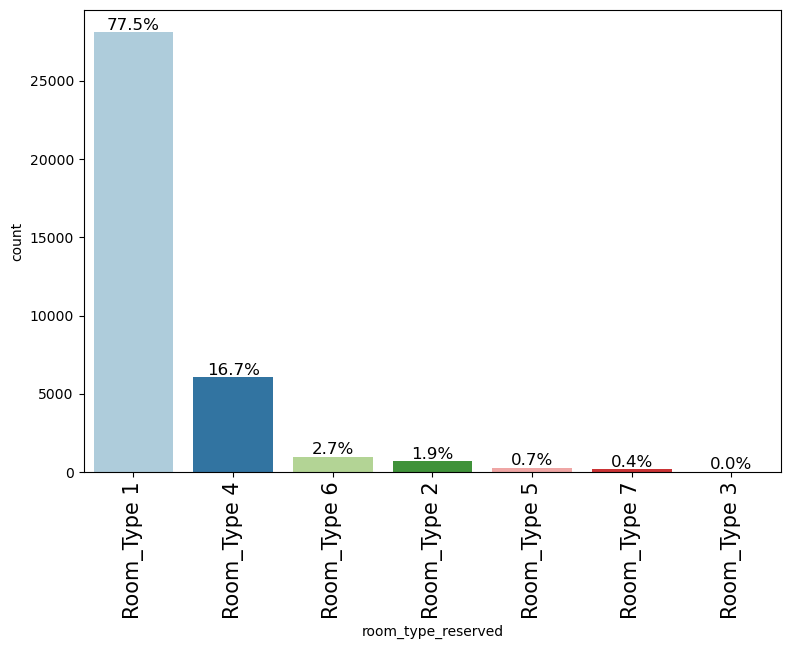

In [56]:
labeled_barplot(df, "room_type_reserved", perc=True)

Room_Type 1 is overwhelmingly the most reserved, making up 77.5% of all bookings.
Room_Type 4 follows at 16.7%, and the remaining types each account for less than 3%

The dataset is heavily imbalanced in terms of room types, with Room_Type 1 dominating.
Such a skew suggests that Room_Type 1 might be the default or most economical option, or it could be overbooked or overrepresented.
Rare categories (Types 3, 5, 7) may be:
- Specialty rooms
- Newly added/retired room types
- Errors or edge cases

#### Observations on lead_time

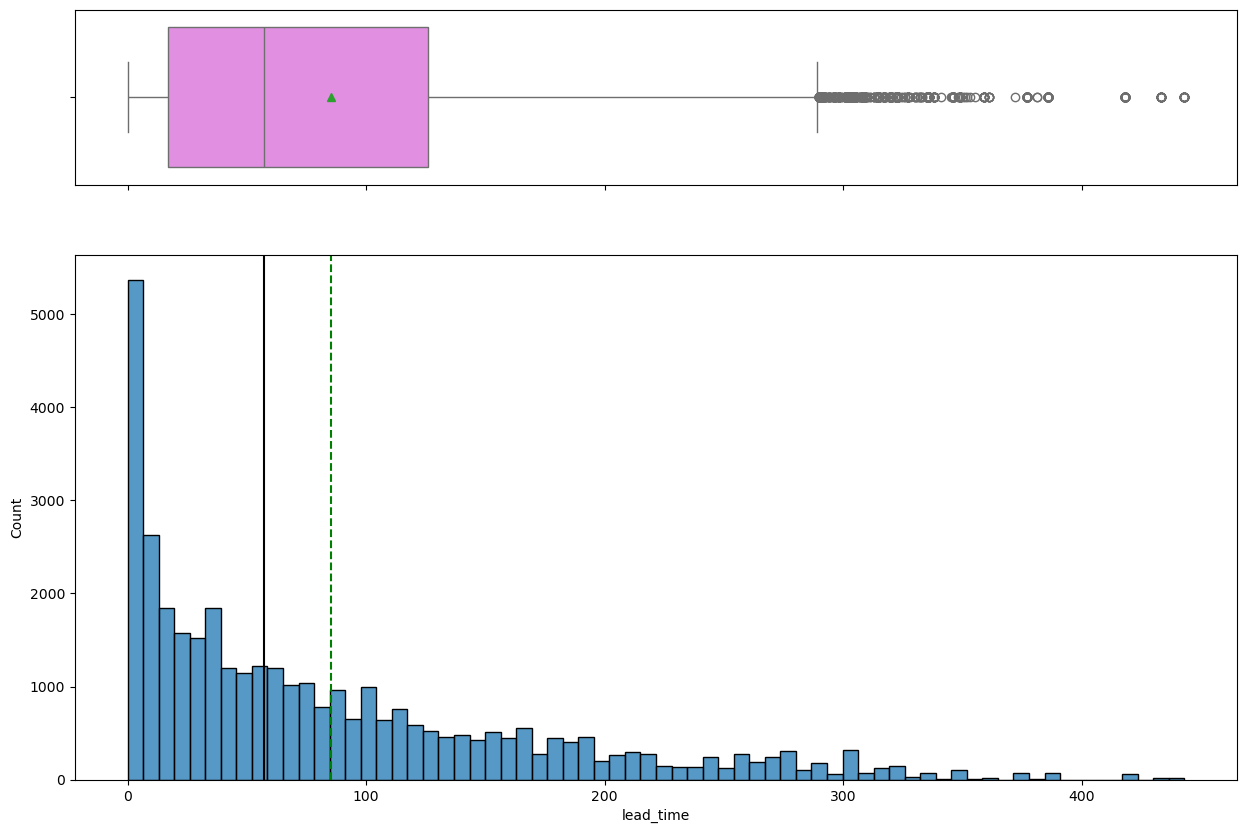

In [59]:
histogram_boxplot(df, "lead_time")

**Boxplot Insights (Top Plot):**
* The distribution is right-skewed (positively skewed).
* The median lead time lies well below the center, suggesting most bookings are made with shorter notice.
* Thre are many outliers on the higher end (beyond ~250 days), indicating some bookings are made extremely early.
* The box itself is wide, showing considerable variability among typical bookings.

**Histogram Insights (Bottom Plot):**
* The most frequent lead time is very short (close to 0–10 days), suggesting many last-minute bookings.
* There’s a steady decline in frequency as lead time increases.
* A green dashed line likely marks the mean lead time, which is noticeably right of the median — another sign of skewness.
* A vertical black line might represent the median, showing the data’s asymmetry.

**Summary:**
* Most bookings are made within the first 0–50 days before check-in.
* Long lead times are less common but still present in significant numbers.
* Outliers and skewness should be considered when modeling or using this variable, especially with linear models.

#### Observations on arrival_year

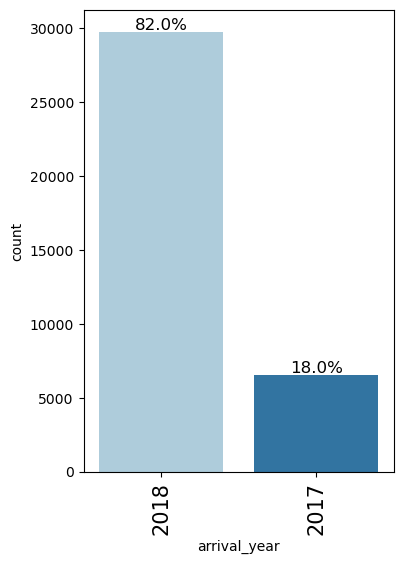

In [62]:
labeled_barplot(df, "arrival_year", perc=True)

- 2018 accounts for 82% of the bookings.
- 2017 accounts for only 18% of the bookings.

The dataset is heavily skewed toward 2018, which could suggest:
* Increased customer volume in 2018.
* More complete data collection in 2018.
* A partial dataset for 2017 or initial rollout.

#### Observations on arrival_month

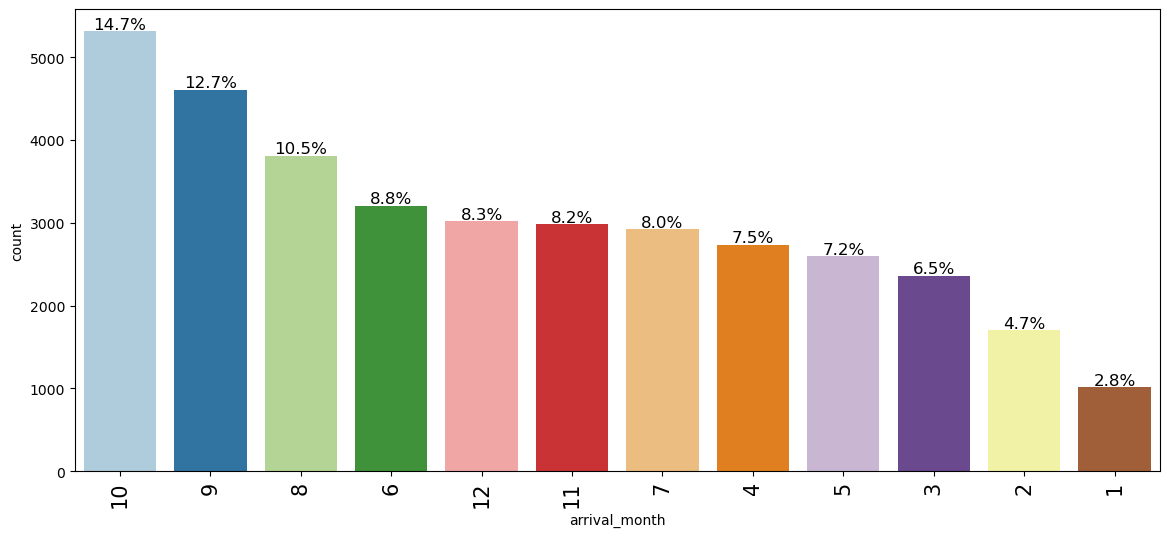

In [65]:
labeled_barplot(df, "arrival_month", perc=True)

October (Month 10) is the peak month, accounting for 14.7% of arrivals.

Followed by:
* September (12.7%)
* August (10.5%)
* June (8.8%)

The lowest booking month is January (2.8%).
There is a clear seasonal trend, with late summer to early fall (Aug–Oct) being the busiest period.
Winter months (Jan–Mar) see significantly fewer arrivals.

#### Observations on arrival_date

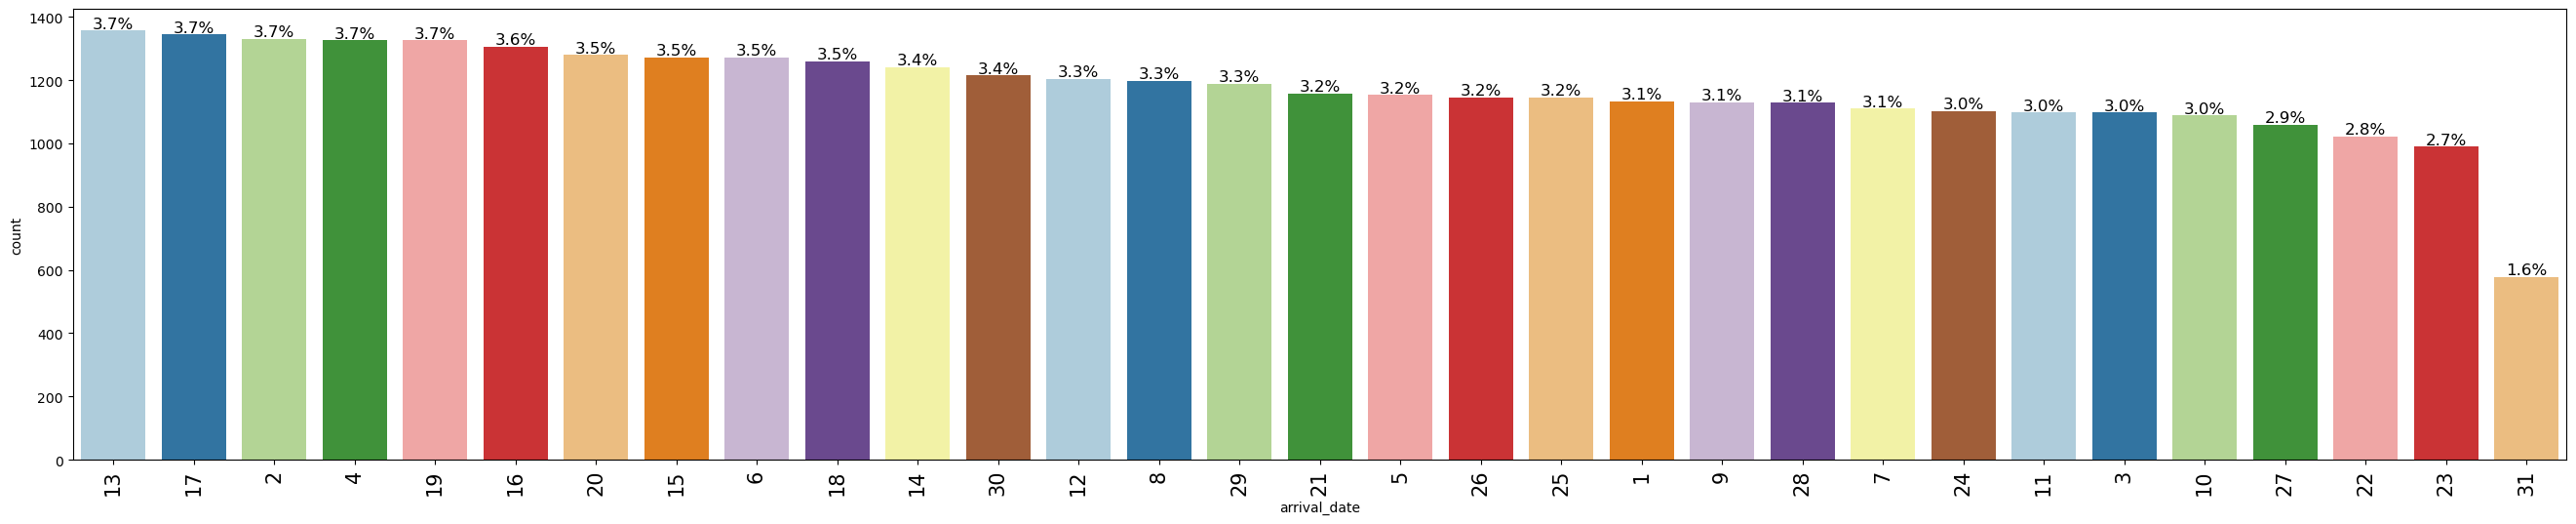

In [68]:
labeled_barplot(df, "arrival_date", perc=True)

- The distribution is fairly uniform across most days of the month.
- The 13th, 17th, 2nd, and 4th each account for 3.7% of bookings — the most frequent arrival dates.
- The 31st has the lowest percentage (1.6%), likely due to fewer months having 31 days.
- The days from the 22nd to 27th also show a slight drop, especially 23rd (2.7%) and 22nd (2.8%).

#### Observations on market_segment_type

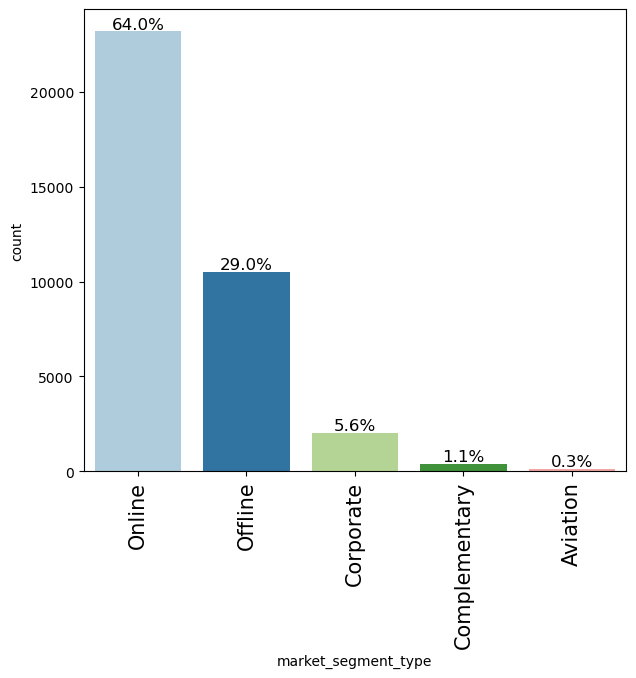

In [71]:
labeled_barplot(df, "market_segment_type", perc=True)

* Online (64%) and Offline (29%) dominate.
* Corporate (5.6%) is the only other notable category.
* Very few from Complementary or Aviation segments.

#### Observations on repeated_guest

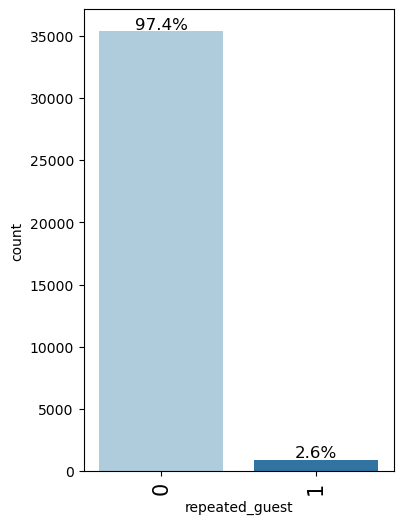

In [74]:
labeled_barplot(df, "repeated_guest", perc=True)

97.4% of the guests are first-time visitors (0).
Only 2.6% are repeated guests (1).

The hotel attracts mostly new customers — effective marketing or location-based appeal.

Low return rate could indicate:
* It's a one-time destination (e.g., resort).
* Potential to improve customer retention or loyalty programs.

#### Observations on no_of_previous_cancellations

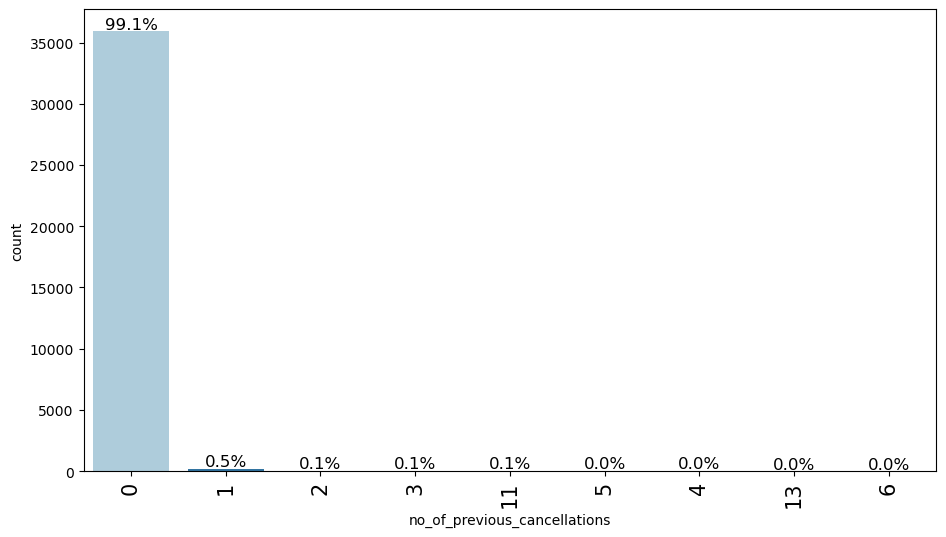

In [77]:
labeled_barplot(df, "no_of_previous_cancellations", perc=True)

99.1% of guests have no prior cancellations.
Only a very small fraction (less than 1%) have canceled one or more times before.

#### Observations on avg_price_per_room

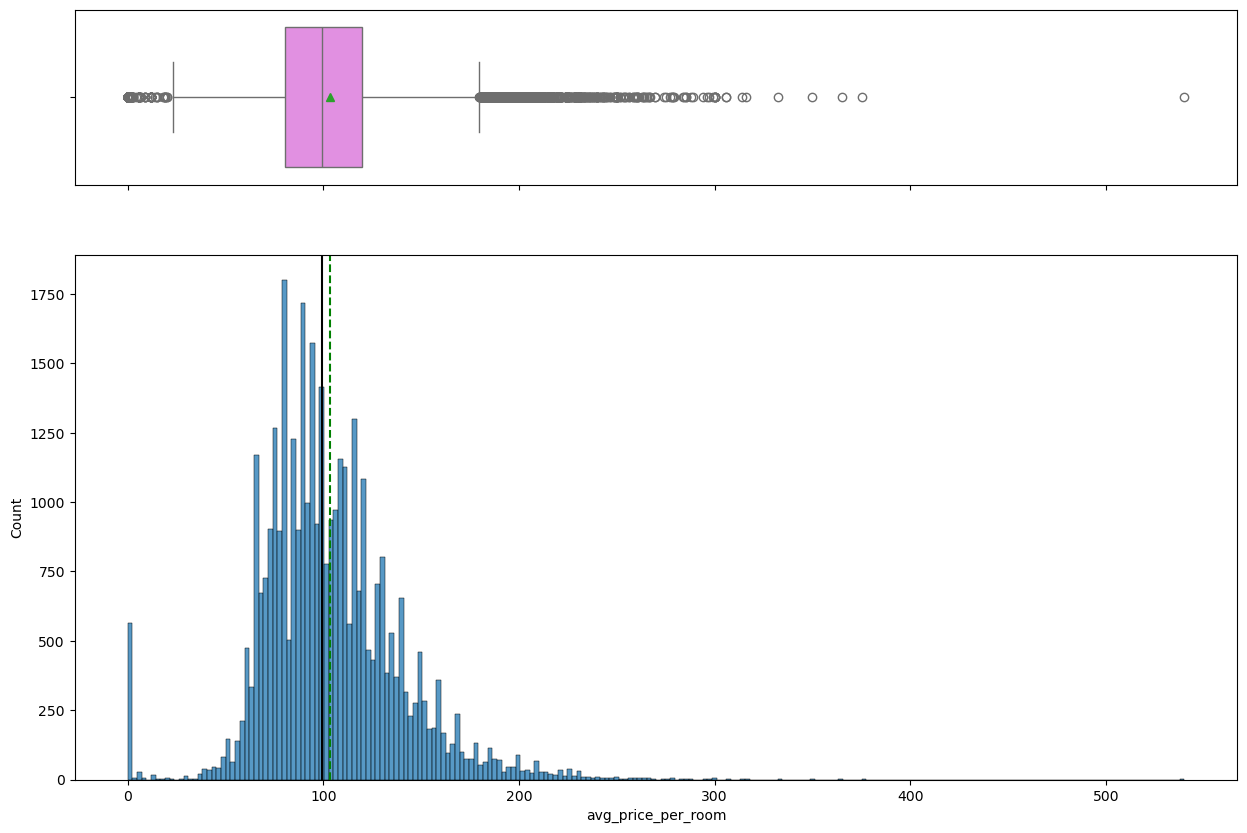

In [80]:
histogram_boxplot(df, "avg_price_per_room")

**Boxplot Observations (Top Plot):**
Many outliers on the higher end (right side), indicating some bookings have significantly higher prices than most others.
The median (vertical line in the box) is around 100, while the interquartile range (IQR) spans approximately 75–125.
The box is relatively centered in the lower part of the price range, again hinting at right skewness.

**Histogram Observations (Bottom Plot):**
The distribution is right-skewed: most values are concentrated between 50 and 150, with a long tail extending beyond 300.
There's a peak around 100, which is close to the mean and median, both marked with vertical lines
A spike at 0 suggests some zero-priced entries, possibly due to:
- Complimentary stays
- Data entry errors
- Promotions or reward redemptions

#### Observations on no_of_special_requests

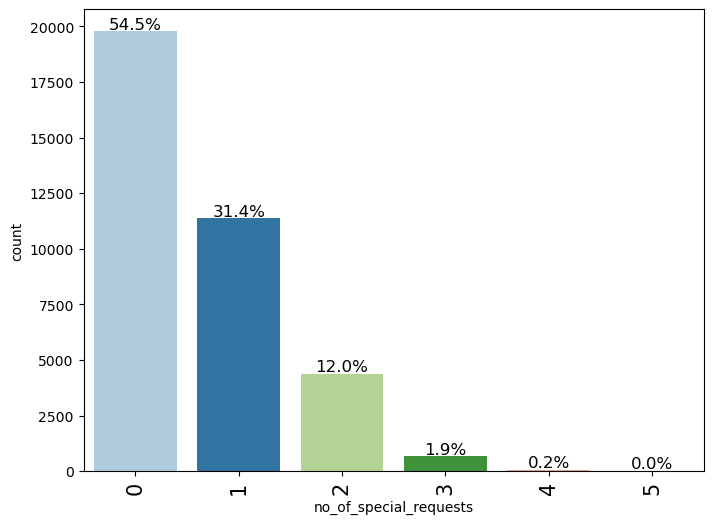

In [83]:
labeled_barplot(df, "no_of_special_requests", perc=True)

* Over half (54.5%) of guests did not make any special requests.
* 31.4% made one special request, while 12% made two.

#### Observations on booking_status

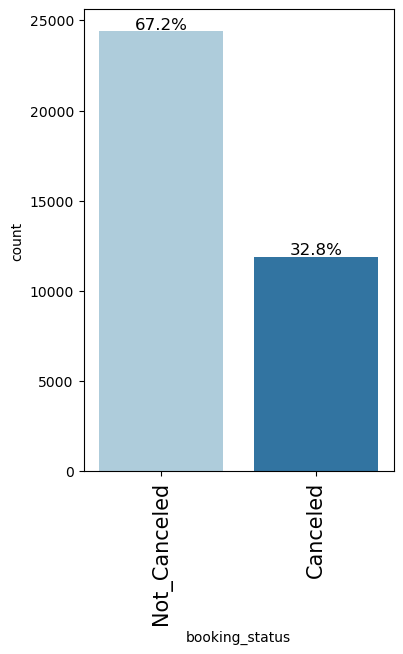

In [86]:
labeled_barplot(df, "booking_status", perc=True)

* Not_Canceled bookings constitute 67.2% of the data.
* Canceled bookings make up the remaining 32.8%.
* The chart indicates a higher rate of successful bookings compared to cancellations.

### Bivariate Analysis

#### no_of_adults vs booking_status

booking_status  Canceled  Not_Canceled    All
no_of_adults                                 
All                11885         24390  36275
2                   9119         16989  26108
1                   1856          5839   7695
3                    863          1454   2317
0                     44            95    139
4                      3            13     16
------------------------------------------------------------------------------------------------------------------------


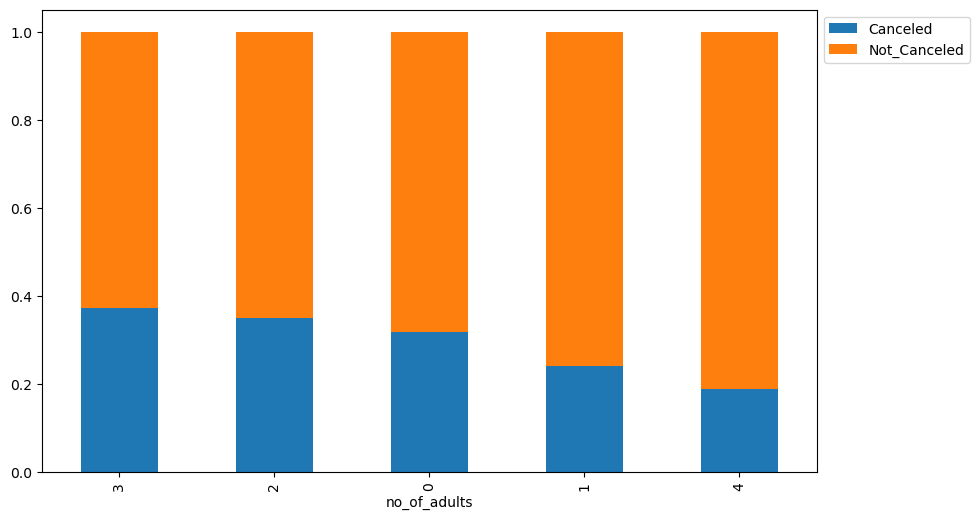

In [90]:
stacked_barplot(df, "no_of_adults", "booking_status")

Cancellation Rate Decreases as the number of adults increases:
- For 0–2 adults: Cancellations are ~35–37%.
- For 3 adults: Cancellations drop slightly.
- For 4 adults: Cancellation rate is under 20%, though the sample size is very small.



* The highest proportion of cancellations occurs with bookings for 0–2 adults, which make up the bulk of all bookings.
* The lowest cancellation rate is observed when there are 4 adults, but due to the tiny sample size (n=16), this might not be statistically significant.
* The trend might suggest that bookings with more adults (potentially families or group travelers) are more likely to follow through.

#### no_of_children vs booking_status

booking_status  Canceled  Not_Canceled    All
no_of_children                               
All                11885         24390  36275
0                  10882         22695  33577
1                    540          1078   1618
2                    457           601   1058
3                      5            14     19
9                      1             1      2
10                     0             1      1
------------------------------------------------------------------------------------------------------------------------


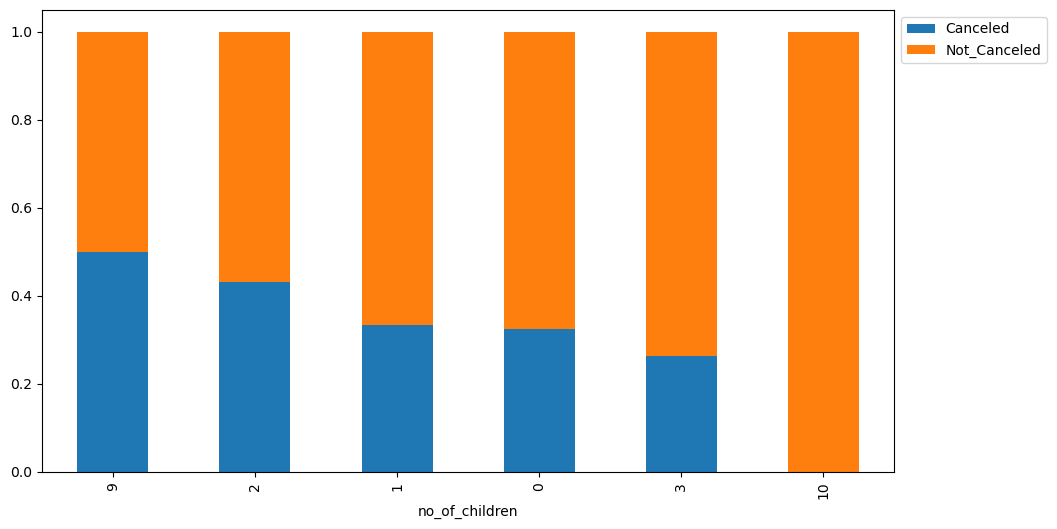

In [93]:
stacked_barplot(df, "no_of_children", "booking_status")

Higher number of children appears correlated with a higher cancellation rate, especially at:
- 2 children: ~43% cancellation
- 9 children: ~53% cancellation — though based on just 19 bookings
* Bookings with 3 or 10 children have low or no cancellations, but due to very low sample size, this is not statistically reliable.
* Zero children bookings (~92.6% of total) show a moderate cancellation rate (comparable to the overall average of 32.8%).

#### market_segment_type vs booking_status

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


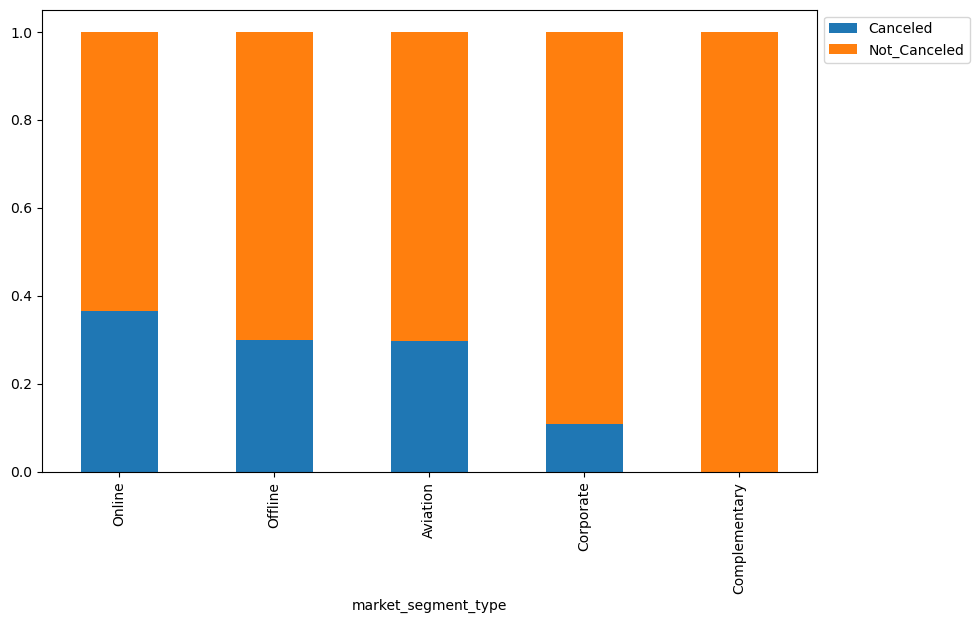

In [96]:
stacked_barplot(df, "market_segment_type", "booking_status")

* Online bookings have the highest cancellation rate (~36.5%), making them a key area for intervention or further segmentation.
* Corporate bookings show a very low cancellation rate (~11%), suggesting strong commitment—possibly due to business travel policies or agreements.
* Complementary bookings have no cancellations at all, but this segment may represent internal or promotion-related bookings and likely shouldn't be treated like the rest.
* Offline and Aviation segments have moderate cancellation rates (~30%).

#### no_of_weekend_nights vs booking_status

booking_status        Canceled  Not_Canceled    All
no_of_weekend_nights                               
All                      11885         24390  36275
0                         5093         11779  16872
1                         3432          6563   9995
2                         3157          5914   9071
4                           83            46    129
3                           74            79    153
5                           29             5     34
6                           16             4     20
7                            1             0      1
------------------------------------------------------------------------------------------------------------------------


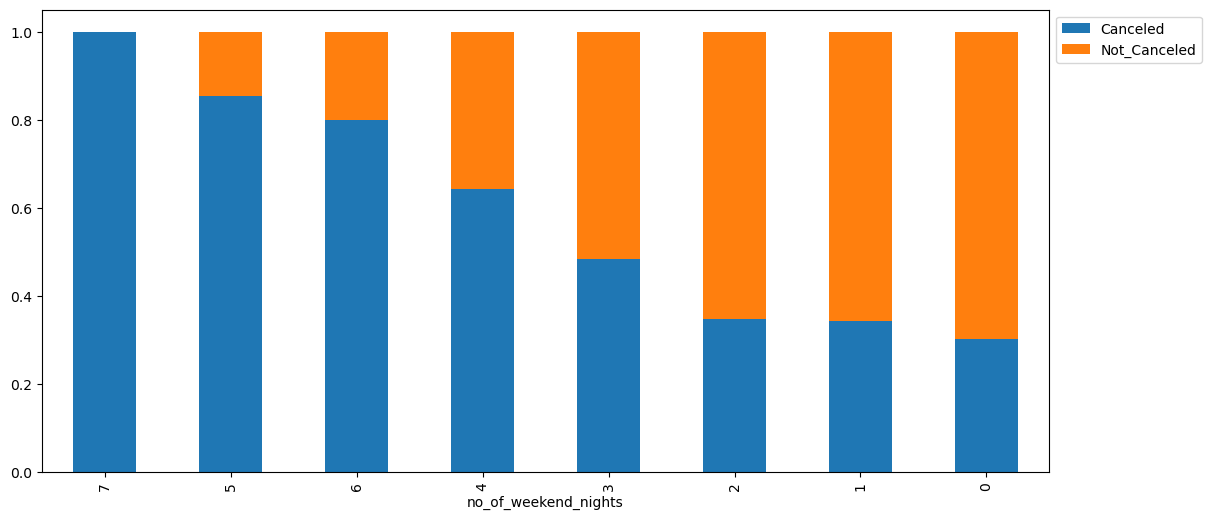

In [99]:
stacked_barplot(df, "no_of_weekend_nights", "booking_status")

* For 0–2 weekend nights (which make up 98% of the data), cancellation rates are consistent with the dataset's overall average (~30–35%).
* As the number of weekend nights increases beyond 3, cancellation rates rise sharply:
- 4 nights: over 60% cancellation rate
- 5–7 nights: over 80% cancellations, though these categories have very few bookings

#### no_of_week_nights vs booking_status

booking_status     Canceled  Not_Canceled    All
no_of_week_nights                               
All                   11885         24390  36275
2                      3997          7447  11444
3                      2574          5265   7839
1                      2572          6916   9488
4                      1143          1847   2990
0                       679          1708   2387
5                       632           982   1614
6                        88           101    189
10                       53             9     62
7                        52            61    113
8                        32            30     62
9                        21            13     34
11                       14             3     17
15                        8             2     10
12                        7             2      9
13                        5             0      5
14                        4             3      7
16                        2             0      2
17                  

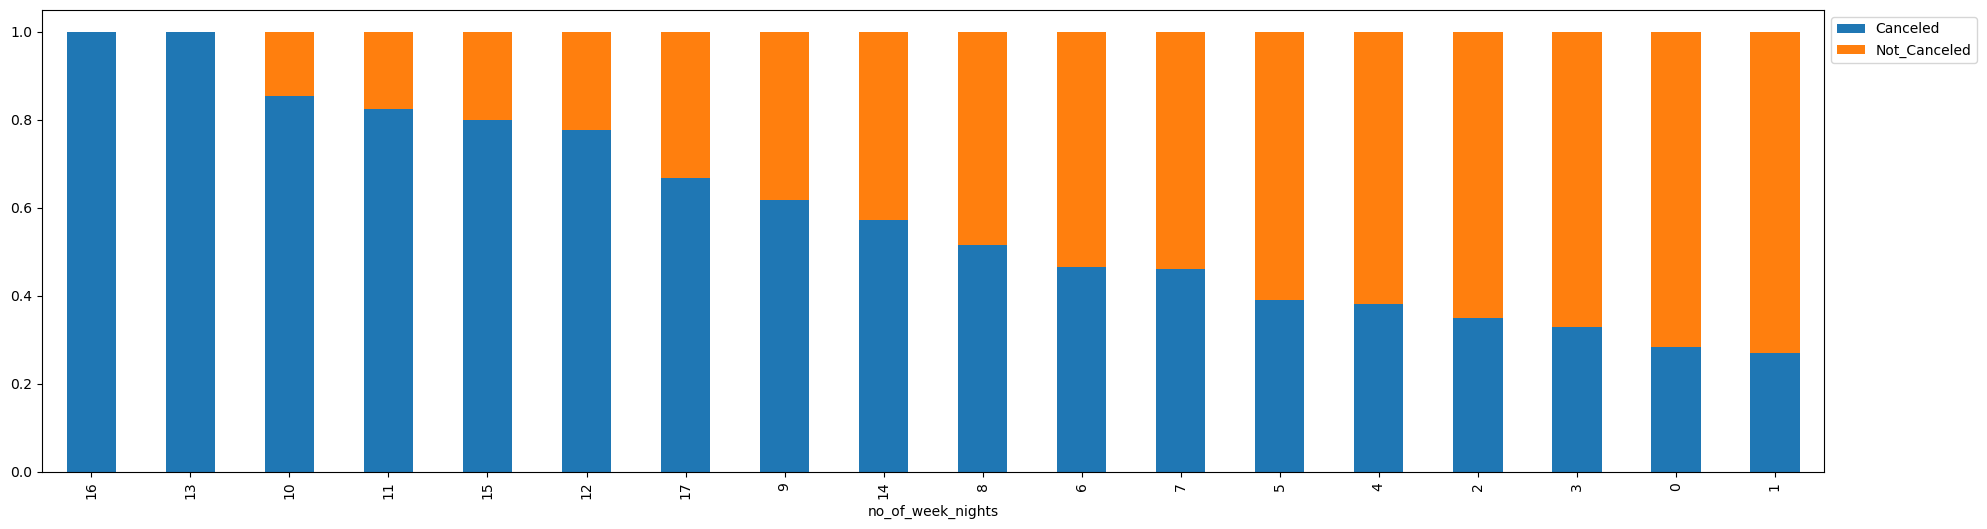

In [102]:
stacked_barplot(df, "no_of_week_nights", "booking_status")

- Shorter stays (0–2 nights) are the most frequent and have lower cancellation rates (~30–35%).
- Moderate stays (3–5 nights) show an increasing trend in cancellations.

Longer weeknight stays (6+ nights) tend to have much higher cancellation rates, especially:
 - 7+ nights: over 60%
 - 13–17 nights: cancellation rate approaches or reaches 100%, but with extremely low counts.

#### arrival_year vs booking_status

booking_status  Canceled  Not_Canceled    All
arrival_year                                 
All                11885         24390  36275
2018               10924         18837  29761
2017                 961          5553   6514
------------------------------------------------------------------------------------------------------------------------


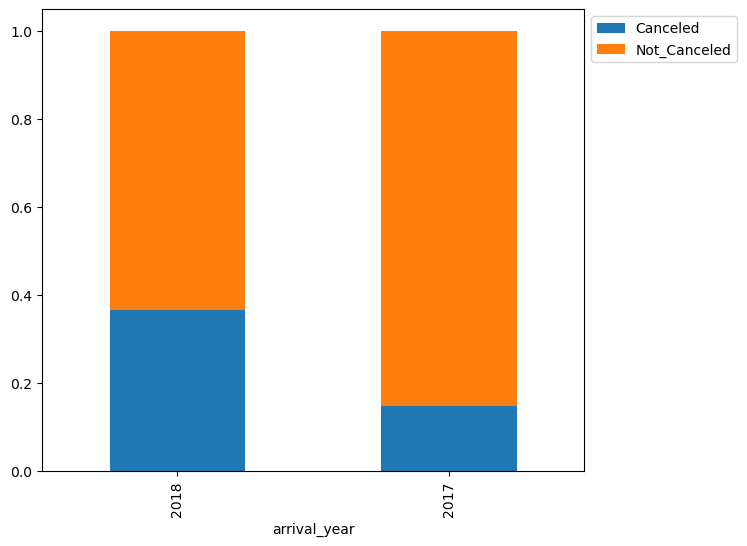

In [105]:
stacked_barplot(df, "arrival_year", "booking_status")

* The 2018 bar shows a significantly higher proportion of cancellations compared to 2017.
* In 2017, the overwhelming majority of bookings were completed (i.e., not canceled).
* The change in cancellation behavior across years is visually and numerically substantial.

#### arrival_month vs booking_status

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


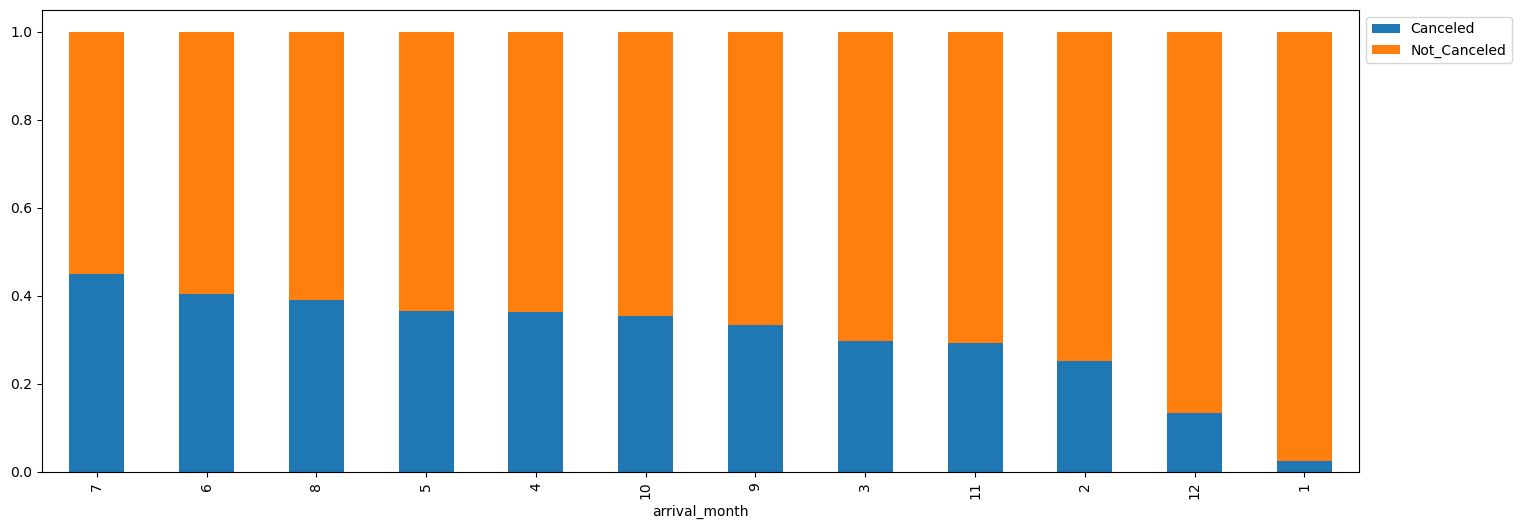

In [108]:
stacked_barplot(df, "arrival_month", "booking_status")

* Summer months (June–August) see the highest cancellation rates, especially July (approaching 45%).
* Winter months (December, January) show very low cancellation rates, with January at only ~2%, though this may be based on limited data.
* Moderate cancellation rates are observed in spring (March–May) and fall (September–November).

#### arrival_date vs booking_status

booking_status  Canceled  Not_Canceled    All
arrival_date                                 
All                11885         24390  36275
15                   538           735   1273
4                    474           853   1327
16                   473           833   1306
30                   465           751   1216
1                    465           668   1133
12                   460           744   1204
17                   448           897   1345
6                    444           829   1273
26                   425           721   1146
19                   413           914   1327
20                   413           868   1281
13                   408           950   1358
28                   405           724   1129
3                    403           695   1098
25                   395           751   1146
21                   376           782   1158
24                   372           731   1103
18                   366           894   1260
7                    364          

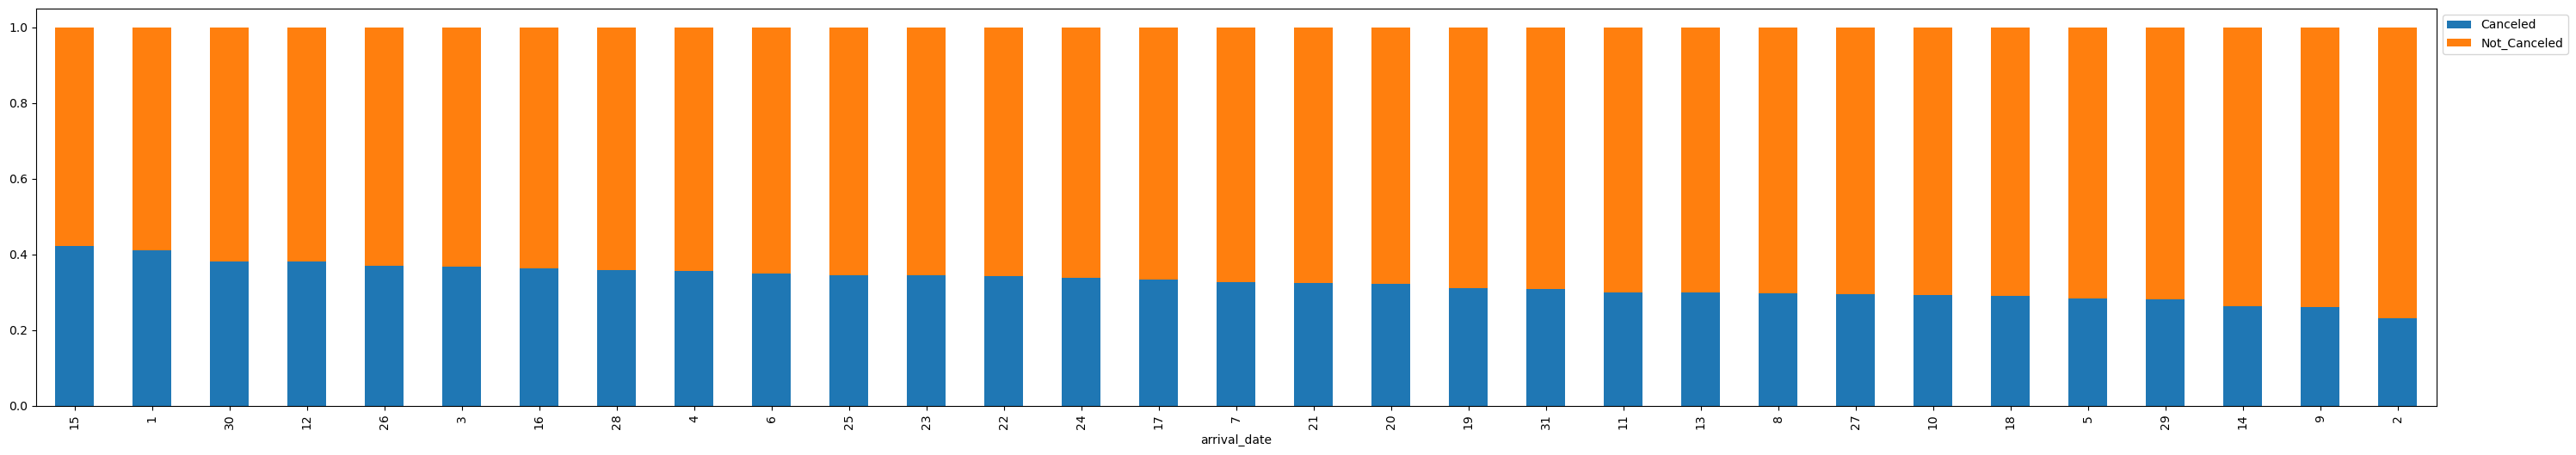

In [111]:
stacked_barplot(df, "arrival_date", "booking_status")

#### room_type_reserved vs booking_status

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


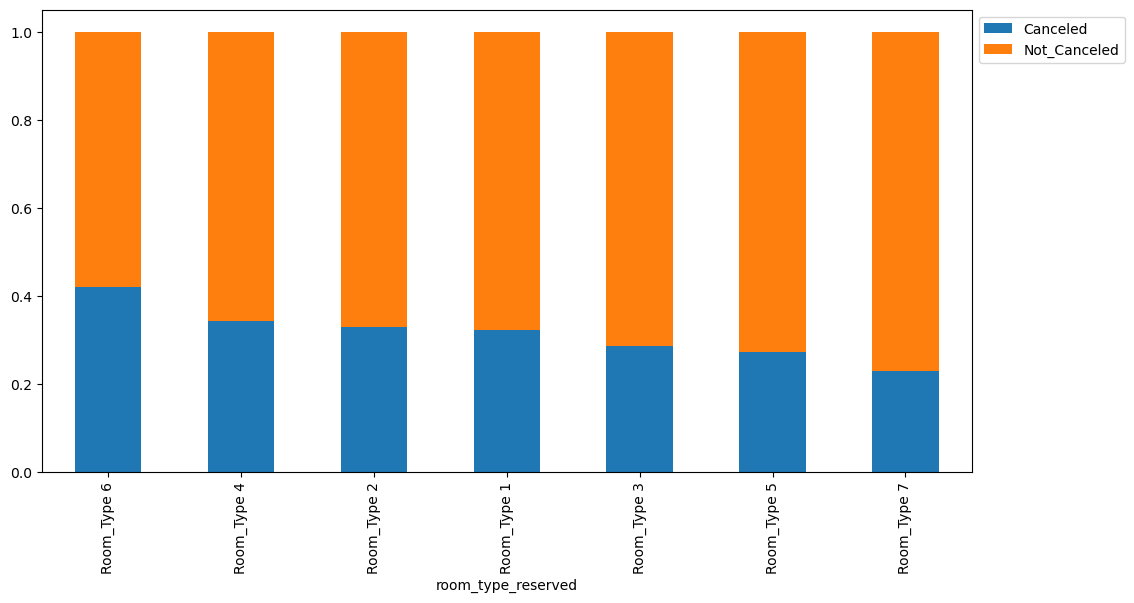

In [113]:
stacked_barplot(df, "room_type_reserved", "booking_status")

* Room_Type 6 shows the highest cancellation rate (over 45%), followed by Room_Type 4.
* Room_Type 1, the most frequently booked, has a cancellation rate consistent with the overall average.
* Room_Types 5 and 3 show lower cancellation rates, potentially indicating more reliable bookings.
* Room_Types 5 and 7 have low booking volume — conclusions should be interpreted cautiously.

#### type_of_meal_plan vs booking_status

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


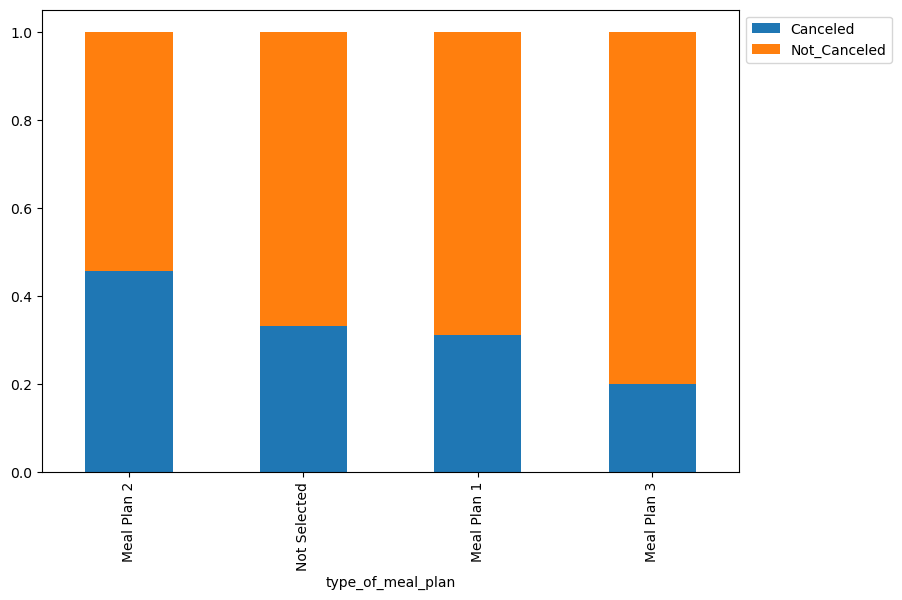

In [116]:
stacked_barplot(df, "type_of_meal_plan", "booking_status")

* Meal Plan 2 has the highest cancellation rate (~46%), significantly higher than others.
* Meal Plan 1, the most popular plan, shows a moderate and consistent cancellation rate (~31%).
* Guests who didn't select a meal plan show a similar rate to Meal Plan 1.
* Meal Plan 3 has very few bookings (n=5), so its low cancellation rate is not statistically meaningful.

#### repeated_guest vs booking_status

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


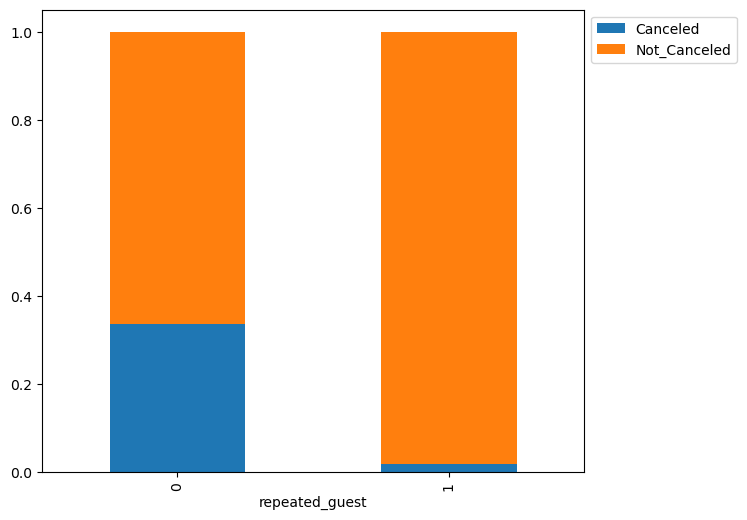

In [119]:
stacked_barplot(df, "repeated_guest", "booking_status")

* Returning guests almost never cancel: Only 16 cancellations out of 930 bookings.
* New guests account for almost all cancellations in the dataset.

#### no_of_previous_cancellations vs booking_status

booking_status                Canceled  Not_Canceled    All
no_of_previous_cancellations                               
All                              11885         24390  36275
0                                11869         24068  35937
1                                   11           187    198
13                                   4             0      4
3                                    1            42     43
2                                    0            46     46
4                                    0            10     10
5                                    0            11     11
6                                    0             1      1
11                                   0            25     25
------------------------------------------------------------------------------------------------------------------------


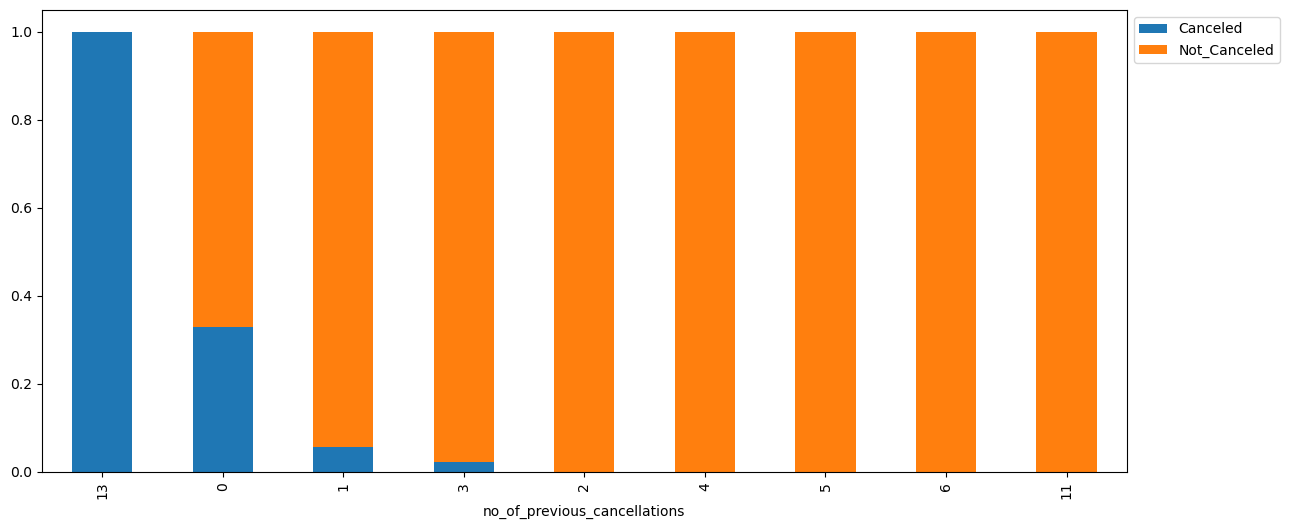

In [122]:
stacked_barplot(df, "no_of_previous_cancellations", "booking_status")

* The overwhelming majority of bookings had 0 previous cancellations, and this group had a moderate cancellation rate (~33%).
* Guests with 1+ previous cancellations almost never cancel again — this is counterintuitive.
* A single extreme outlier at 13 previous cancellations shows a 100% cancel rate — but it's just one booking.

#### no_of_special_requests vs booking_status

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


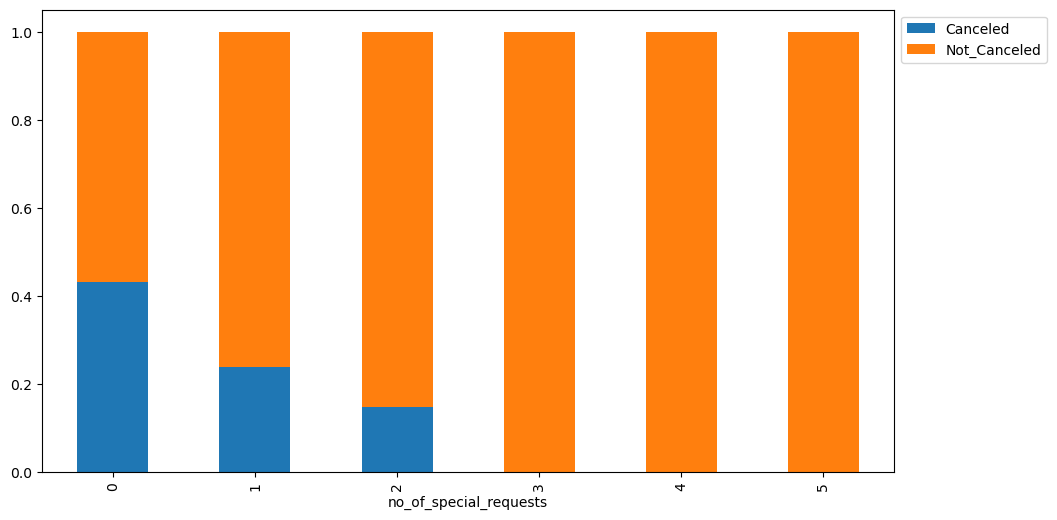

In [125]:
stacked_barplot(df, "no_of_special_requests", "booking_status")

There’s a strong inverse relationship between the number of special requests and cancellation rate:
- More requests = lower chance of cancellation
- Guests with 0 requests have the highest cancellation rate (~43%).

Those with 3 or more requests never cancel in this dataset.

#### required_car_parking_space vs booking_status

booking_status              Canceled  Not_Canceled    All
required_car_parking_space                               
All                            11885         24390  36275
0                              11771         23380  35151
1                                114          1010   1124
------------------------------------------------------------------------------------------------------------------------


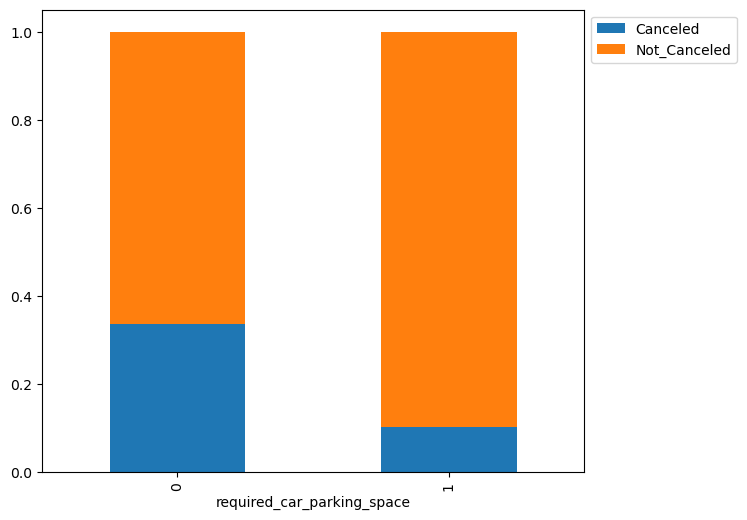

In [128]:
stacked_barplot(df, "required_car_parking_space", "booking_status")

* Guests who requested parking (1) show a dramatically lower cancellation rate (~10%) compared to those who didn’t (~33.5%).
* The visual clearly shows more commitment among guests requiring parking

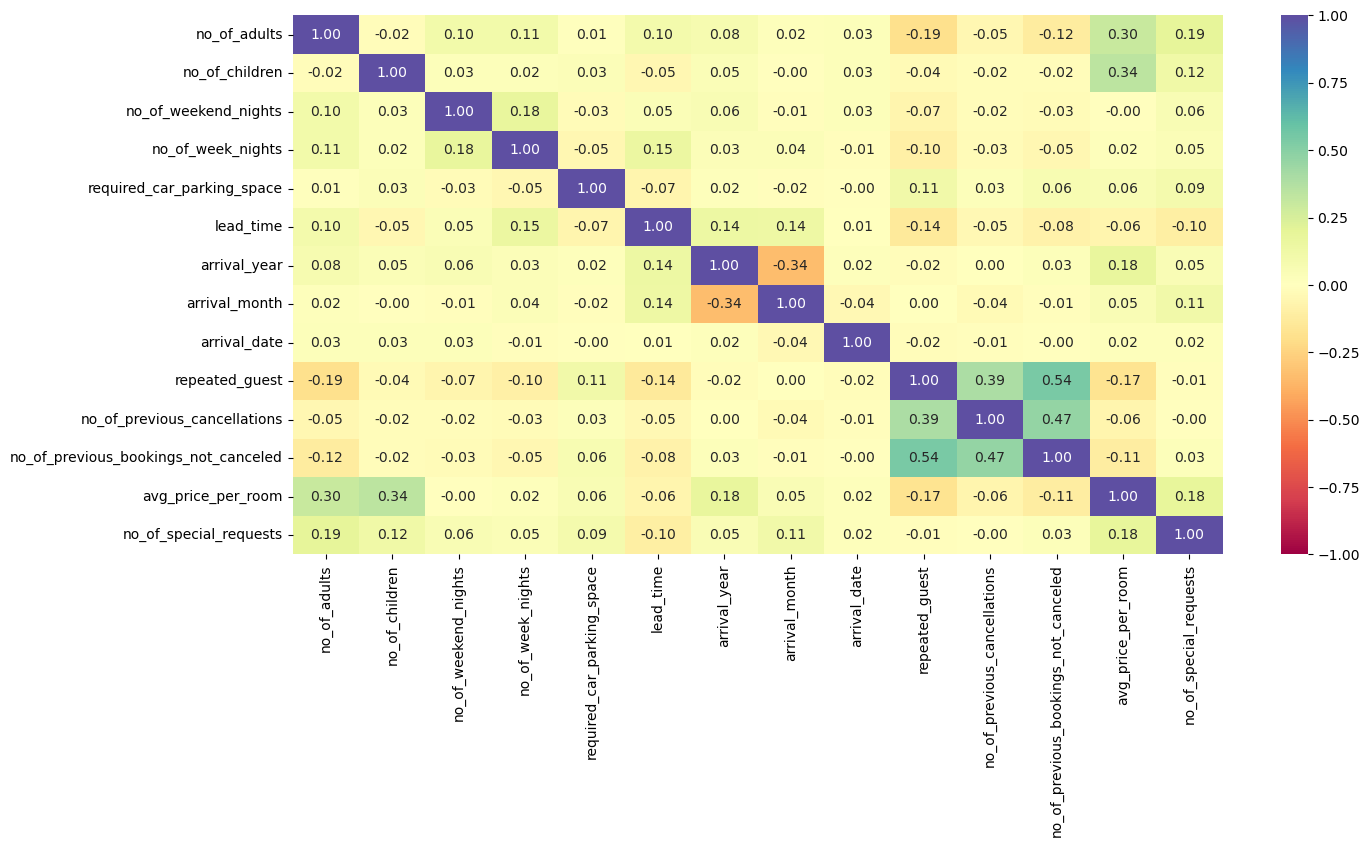

In [130]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [131]:
#sns.pairplot(df, hue="booking_status")
#plt.show()

#### avg_price_per_room vs booking_status

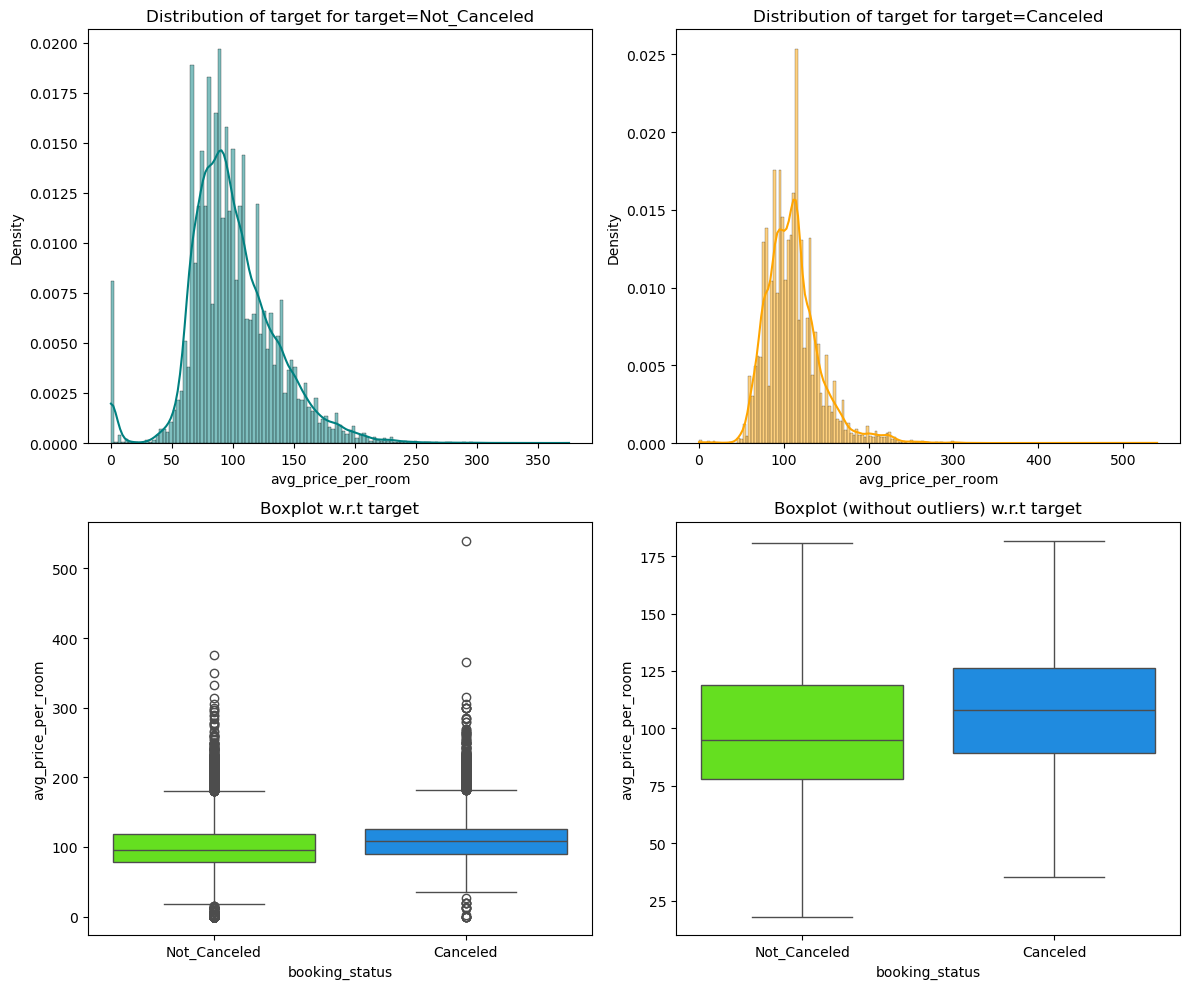

In [133]:
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

**Not_Canceled:**
- Long right tail.
- Most frequent room prices are concentrated between 50–125.
- Distribution is slightly wider compared to cancellations.

**Canceled:**
- Sharper peak around 100–125.
- Less spread in lower price ranges, indicating fewer low-cost bookings are canceled.
- Slightly more bookings at higher price points.

**Boxplots:** <br>
With outliers:
- Both groups show outliers > 300, but similar IQRs.
- Median price appears slightly higher for canceled bookings.

Without outliers:
- Canceled bookings have higher median and higher upper quartile.
- Suggests customers canceling rooms may be booking higher-priced accommodations.

#### lead_time vs booking_status

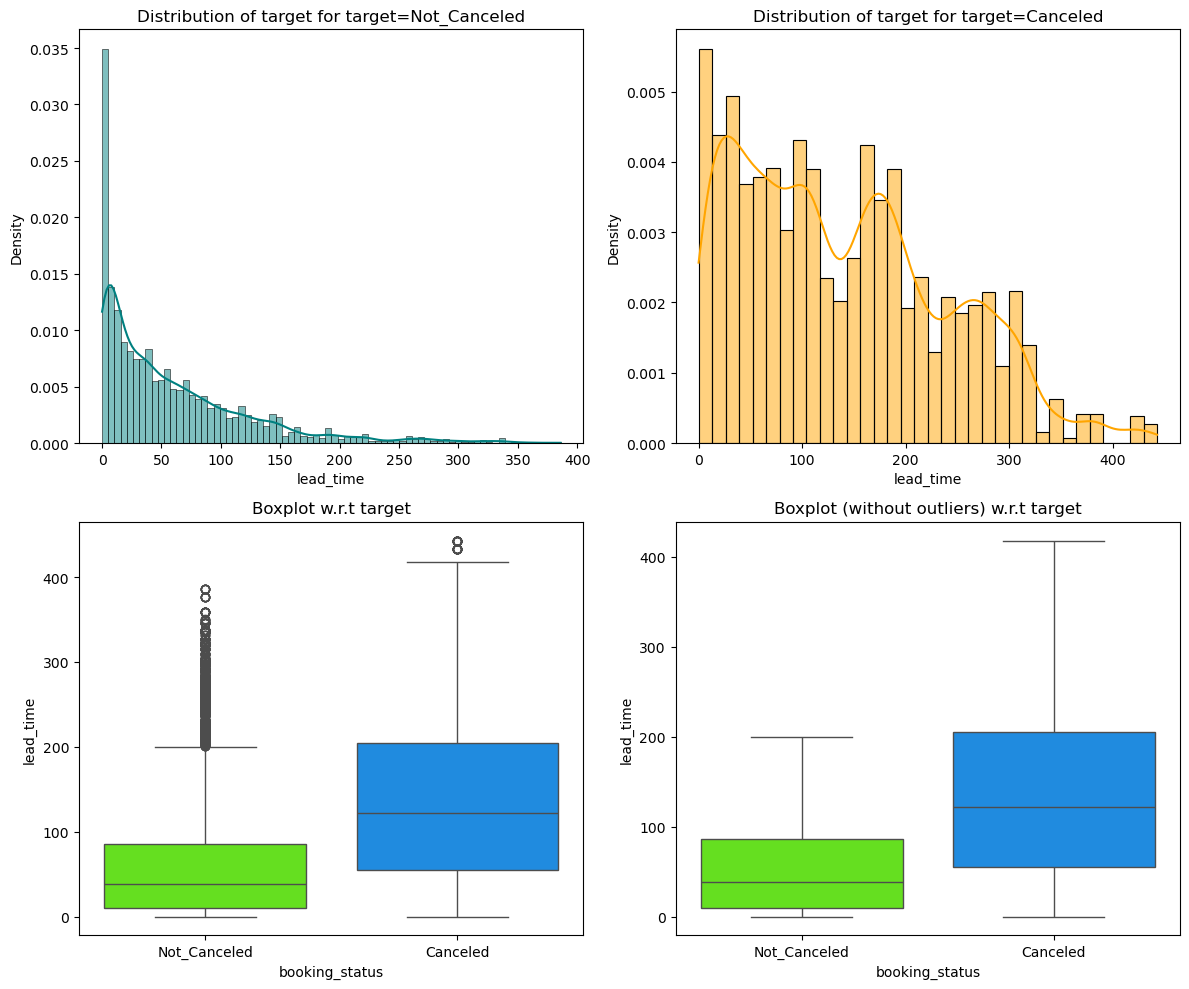

In [136]:
distribution_plot_wrt_target(df, "lead_time", "booking_status")

**Not_Canceled:**

- Highly right-skewed.
- Most bookings occur within 0–50 days before check-in.
- Sharp decline in density as lead time increases.

**Canceled:**
- Much flatter and wider distribution.
- Cancellations are more common across a broad range of lead times, especially between 50–250 days.
- Noticeable density from 100 to 300 days, showing long-lead bookings are more likely to cancel.

**Boxplots:** <br>
With outliers:
- Median lead time for canceled bookings is significantly higher than for not canceled.
- Canceled group has a wider spread and more outliers.

Without outliers:
- Median lead time for canceled bookings is well above that of not canceled (~125 vs ~40 days).
- Interquartile range for canceled bookings is also much wider.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

#### Missing value treatment

In [140]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

#### Outlier detection and treatment

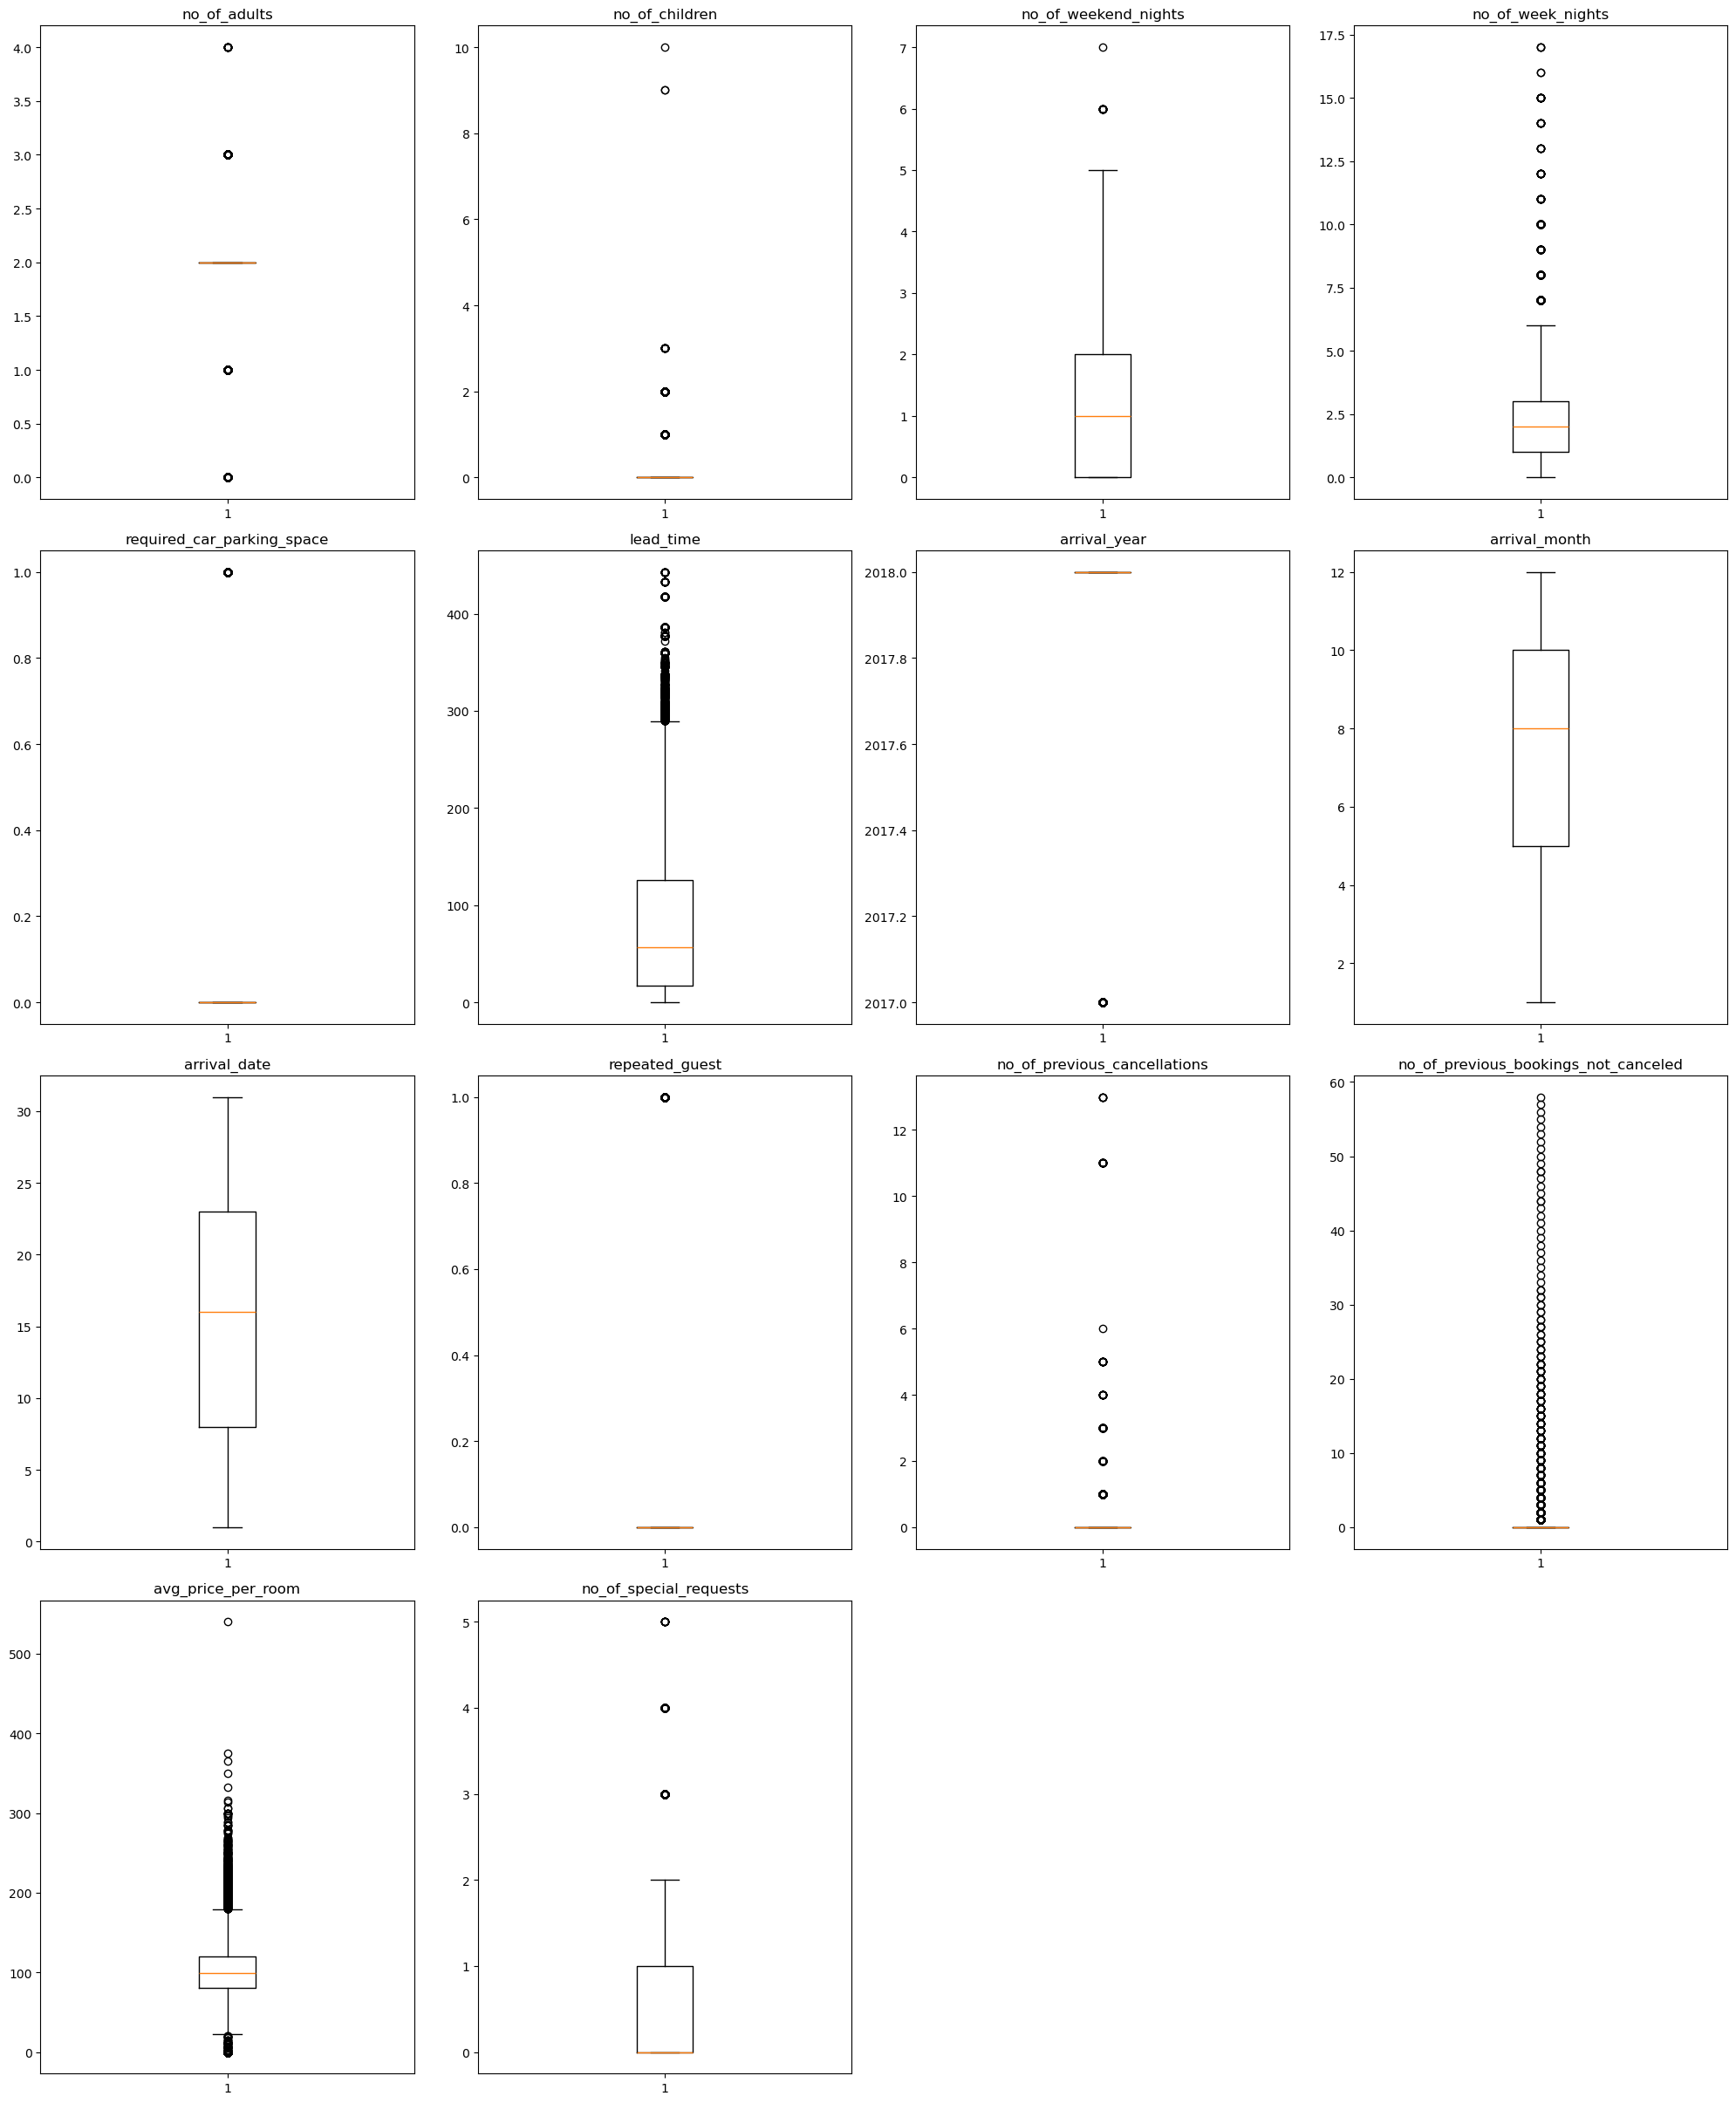

In [142]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [143]:
# copying data to another varaible to avoid any changes to original data
data_clean = df.copy()

In [144]:
data_clean.shape

(36275, 18)

In [145]:
data_clean = data_clean[data_clean['no_of_adults'] != 0]

In [146]:
data_clean = data_clean[~data_clean['no_of_children'].isin([9, 10])]

We removed rows containing outliers in the following columns:

- no_of_adults: Rows where the number of adults was equal to 0 were removed, as such values are unrealistic for a hotel booking.

- no_of_children: Rows where the number of children was equal to 9 or 10 were removed, as these values represent extreme cases and are considered outliers in the context of typical hotel bookings.

This outlier treatment was applied to improve data quality and ensure more reliable model training and analysis.

In [148]:
data_clean.shape

(36133, 18)

#### Preparing data for modeling

**Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis**

In [151]:
data_clean["booking_status"] = data_clean["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

In [152]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36133 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36133 non-null  int64  
 1   no_of_children                        36133 non-null  int64  
 2   no_of_weekend_nights                  36133 non-null  int64  
 3   no_of_week_nights                     36133 non-null  int64  
 4   type_of_meal_plan                     36133 non-null  object 
 5   required_car_parking_space            36133 non-null  int64  
 6   room_type_reserved                    36133 non-null  object 
 7   lead_time                             36133 non-null  int64  
 8   arrival_year                          36133 non-null  int64  
 9   arrival_month                         36133 non-null  int64  
 10  arrival_date                          36133 non-null  int64  
 11  market_segment_type 

#### Creating training and test sets.

In [154]:
# specifying the independent  and dependent variables
X = data_clean.drop(["booking_status"], axis=1)
Y = data_clean["booking_status"]

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)
X = X.astype(float)

# adding constant
X = sm.add_constant(X)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [155]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25293, 28)
Shape of test set :  (10840, 28)
Percentage of classes in training set:
booking_status
0    0.674179
1    0.325821
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0    0.667989
1    0.332011
Name: proportion, dtype: float64


In [156]:
 X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25293 entries, 22036 to 33132
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   const                                 25293 non-null  float64
 1   no_of_adults                          25293 non-null  float64
 2   no_of_children                        25293 non-null  float64
 3   no_of_weekend_nights                  25293 non-null  float64
 4   no_of_week_nights                     25293 non-null  float64
 5   required_car_parking_space            25293 non-null  float64
 6   lead_time                             25293 non-null  float64
 7   arrival_year                          25293 non-null  float64
 8   arrival_month                         25293 non-null  float64
 9   arrival_date                          25293 non-null  float64
 10  repeated_guest                        25293 non-null  float64
 11  no_of_previous_c

In [157]:
X_train.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
22036,1.0,2.0,0.0,0.0,1.0,0.0,55.0,2018.0,4.0,6.0,0.0,0.0,0.0,104.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
35385,1.0,2.0,0.0,1.0,3.0,0.0,127.0,2018.0,7.0,25.0,0.0,0.0,0.0,89.25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
194,1.0,2.0,0.0,4.0,10.0,0.0,147.0,2018.0,8.0,3.0,0.0,0.0,0.0,118.88,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6705,1.0,2.0,1.0,1.0,2.0,0.0,91.0,2018.0,5.0,13.0,0.0,0.0,0.0,140.40,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1830,1.0,2.0,0.0,1.0,2.0,0.0,19.0,2018.0,9.0,19.0,0.0,0.0,0.0,95.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# **Model Building**

In [159]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [160]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Logistic Regression (with statsmodels library)

### Fitting the Model

In [163]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25293
Model:                          Logit   Df Residuals:                    25265
Method:                           MLE   Df Model:                           27
Date:                Sun, 22 Jun 2025   Pseudo R-squ.:                  0.3270
Time:                        23:51:33   Log-Likelihood:                -10745.
converged:                      False   LL-Null:                       -15964.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -812.1594    120.546     -6.737      0.000   -1048.425    -575.894
no_of_adults                             0.0914      

C:\Users\andre\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


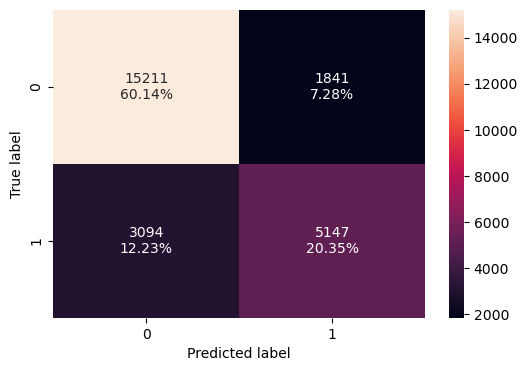

In [164]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [165]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.804887,0.62456,0.736548,0.675947


**Observations**
### Model Fit Summary
- **Pseudo R-squared:** `0.327` – indicates moderate model fit.
- **Log-Likelihood:** `-10745`
- **LLR p-value:** `0.000` – model is statistically significant compared to null.


### Significant Features (p < 0.05)

These variables significantly contribute to the model:

- `no_of_week_nights`
- `lead_time`
- `arrival_year`
- `arrival_month`
- `avg_price_per_room`
- `no_of_special_requests`
- `type_of_meal_plan_Not Selected`
- `room_type_reserved_Room_Type 2`
- `room_type_reserved_Room_Type 4`
- `room_type_reserved_Room_Type 6`
- `market_segment_type_Offline`

## Multicollinearity

### Additional Information on VIF

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearity that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βk is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model.

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use.

In [170]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                   3.930676e+07
no_of_adults                            1.336501e+00
no_of_children                          2.223153e+00
no_of_weekend_nights                    1.065835e+00
no_of_week_nights                       1.094993e+00
required_car_parking_space              1.034825e+00
lead_time                               1.387834e+00
arrival_year                            1.418583e+00
arrival_month                           1.269876e+00
arrival_date                            1.007902e+00
repeated_guest                          1.779255e+00
no_of_previous_cancellations            1.335907e+00
no_of_previous_bookings_not_canceled    1.629765e+00
avg_price_per_room                      2.044343e+00
no_of_special_requests                  1.254177e+00
type_of_meal_plan_Meal Plan 2           1.260908e+00
type_of_meal_plan_Meal Plan 3           1.016220e+00
type_of_meal_plan_Not Selected          1.272762e+00
room_type_r

- **Extremely high VIF values:**
  - `market_segment_type_Online`: **70.3** → severe multicollinearity
  - `market_segment_type_Offline`: **6.32**
  - `market_segment_type_Complementary`: **4.73**
  - `arrival_year`: **4.12**

- **Most other features** have VIF < 2 → no multicollinearity concern

- Remove or consolidate features with high VIF (e.g., market segment dummies).

**Dropping market_segment_type_Online**

In [174]:
X_train1 = X_train.drop(["market_segment_type_Online"], axis=1)

In [175]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                   3.921797e+07
no_of_adults                            1.319816e+00
no_of_children                          2.222874e+00
no_of_weekend_nights                    1.065826e+00
no_of_week_nights                       1.094984e+00
required_car_parking_space              1.034781e+00
lead_time                               1.383938e+00
arrival_year                            1.415728e+00
arrival_month                           1.268335e+00
arrival_date                            1.007860e+00
repeated_guest                          1.775096e+00
no_of_previous_cancellations            1.335819e+00
no_of_previous_bookings_not_canceled    1.629337e+00
avg_price_per_room                      2.043155e+00
no_of_special_requests                  1.249389e+00
type_of_meal_plan_Meal Plan 2           1.260590e+00
type_of_meal_plan_Meal Plan 3           1.016220e+00
type_of_meal_plan_Not Selected          1.270712e+00
room_type_r

In [176]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit()
print(lg1.summary())

         Current function value: 0.424823
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25293
Model:                          Logit   Df Residuals:                    25266
Method:                           MLE   Df Model:                           26
Date:                Sun, 22 Jun 2025   Pseudo R-squ.:                  0.3269
Time:                        23:51:37   Log-Likelihood:                -10745.
converged:                      False   LL-Null:                       -15964.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -817.7149    120.378     -6.793      0.000   -1053.651

C:\Users\andre\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Removing high p-value variables

* For other attributes present in the data, the p-values are high only for few dummy variables and since only one (or some) of the categorical levels have a high p-value we will drop them iteratively as sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.

* Instead, we will do the following repeatedly using a loop:
  - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
  - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
  - Repeat the above two steps till there are no columns with p-value > 0.05.


Note: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [179]:
# initial list of columns
cols = X_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

C:\Users\andre\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\andre\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['const', 'no_of_adults', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


* The above columns are the significant column.
* We see that the loop has removed the constant also but we will need it to build the logistic regression model. So along with the significant variables we will keep the 'const' column as well.

In [181]:
X_train2 = X_train1[selected_features]

In [182]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25293
Model:                          Logit   Df Residuals:                    25274
Method:                           MLE   Df Model:                           18
Date:                Sun, 22 Jun 2025   Pseudo R-squ.:                  0.3258
Time:                        23:51:39   Log-Likelihood:                -10764.
converged:                       True   LL-Null:                       -15964.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -747.5124    116.529     -6.415      0.000    -975.905    -519.120
no_of_adults                       0.0890      0.038      2.334      0.

**Now no categorical feature has p-value greater than 0.05, so we'll consider the features in *X_train3* as the final ones and *lg3* as final model.**

### Coefficient Interpretations

* Coefficient of some levels of education, workclass, and native country are positive an increase in these will lead to increase in chances of a person having <=50K salary.

* Coefficient of age, fnlwgt, marital_status, working_hours_per_week, some levels of education, workclass, and native country are negative increase in these will lead to decrease in chances of a person having <=50K salary.

**Converting coefficients to odds**

* The coefficients ($\beta$s) of the logistic regression model are in terms of $log(odds)$ and to find the odds, we have to take the exponential of the coefficients
* Therefore, **$odds =  exp(\beta)$**
* The percentage change in odds is given as $(exp(\beta) - 1) * 100$

In [187]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

,const,no_of_adults,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.0,1.093082,1.142814,1.027896,0.214652,1.015864,1.446332,0.956431,0.115513,1.019630,0.226320,1.212915,0.727774,0.740641,0.455277,0.472971,0.246122,0.411015,0.172383
Change_odd%,-100.0,9.308172,14.281429,2.789626,-78.534835,1.586375,44.633195,-4.356921,-88.448716,1.962996,-77.367961,21.291545,-27.222644,-25.935922,-54.472272,-52.702948,-75.387831,-58.898459,-82.761687


- Features like `lead_time`, `no_of_adults`, and `meal plan not selected` **increase** the probability of booking.
- High negative impact from:  
  - `repeated_guest`,  
  - `special_requests`,  
  - room types 5–7,  
  - corporate and offline segments.

These can inform **targeted interventions** or **predictive triggers** for your booking pipeline.


### Checking performance of the new model

**Training set performance**

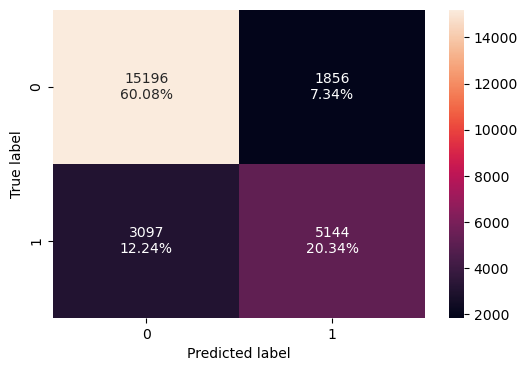

In [191]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train)

In [192]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg2, X_train2, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.804175,0.624196,0.734857,0.675021


**Test set performance**

In [194]:
X_test2 = X_test[list(X_train2.columns)]

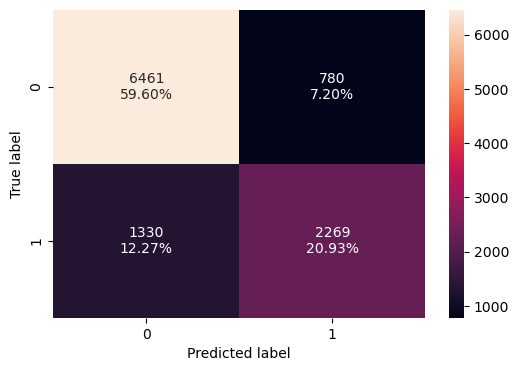

In [195]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test)

In [196]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, X_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.805351,0.630453,0.744178,0.682611


- The cleaned model (lg2) **generalizes better**: performance on the test set is strong and slightly better than on the training set.
- **No signs of overfitting**: metrics are consistent across train/test splits.
- **Precision-recall balance improved**, making the model more useful in real-world booking prediction scenarios.


## Model Performance Improvement

* Let's see if the f1_score can be improved further by changing the model threshold
* First, we will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
* Next, we will check the Precision-Recall curve to find the right balance between precision and recall as our metric of choice is f1_score

### ROC Curve and ROC-AUC

* ROC-AUC on training set

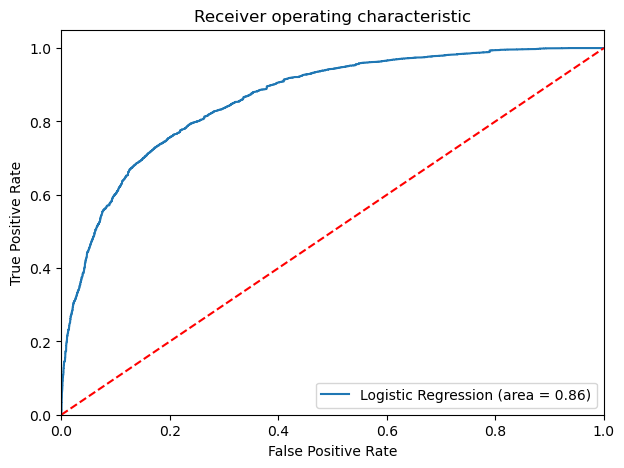

In [202]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.

### Optimal threshold using AUC-ROC curve

In [205]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.34387406627651484


**Checking model performance on training set**

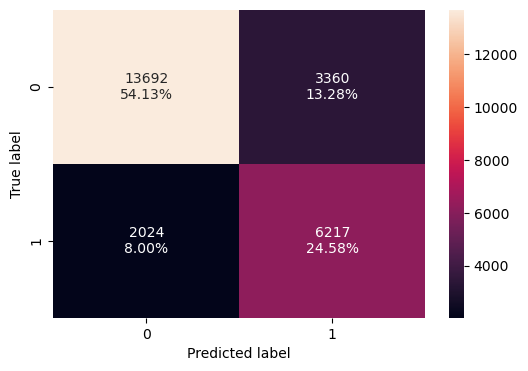

In [207]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [208]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.787135,0.754399,0.649159,0.697834


**Checking model performance on test set**

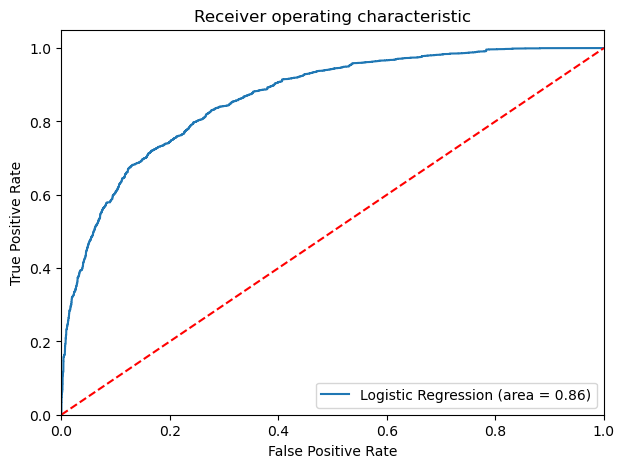

In [210]:
logit_roc_auc_train = roc_auc_score(y_test, lg2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

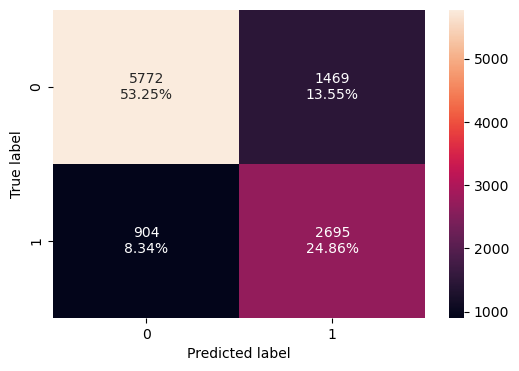

In [211]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [212]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.781089,0.748819,0.647214,0.694319


### Precision-Recall Curve

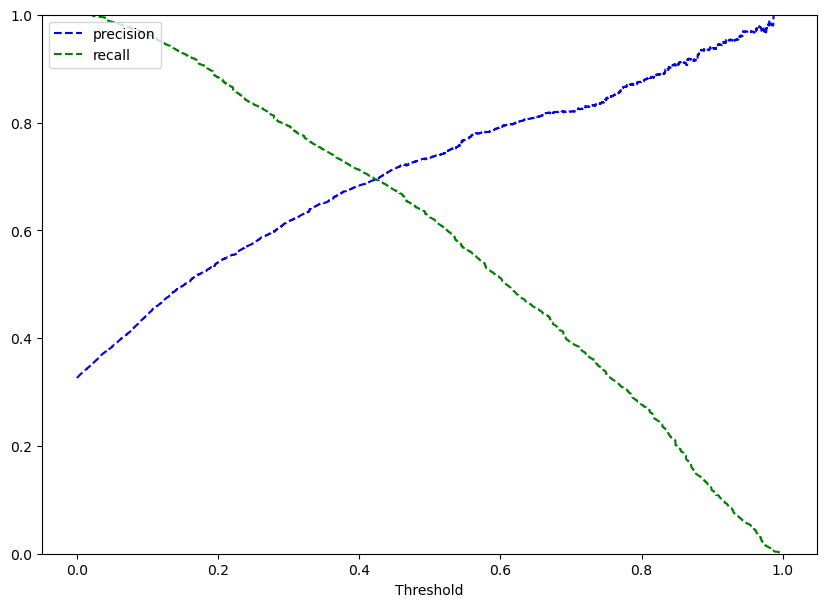

In [214]:
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [215]:
# setting the threshold
optimal_threshold_curve = 0.41

**Checking model performance on training set**

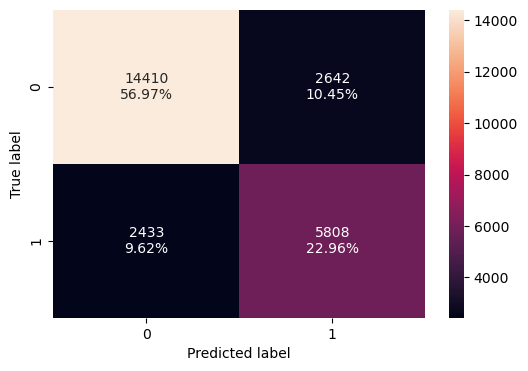

In [217]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train, threshold=optimal_threshold_curve)

In [218]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.799352,0.704769,0.687337,0.695944


**Checking model performance on test set**

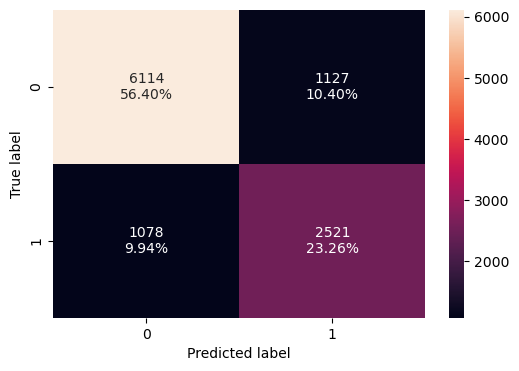

In [220]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_curve)

In [221]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.796587,0.700472,0.691064,0.695736


## Model Performance Comparison and Final Model Selection

In [223]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.34 Threshold",
    "Logistic Regression-0.41 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.34 Threshold,Logistic Regression-0.41 Threshold
Accuracy,0.804175,0.787135,0.799352
Recall,0.624196,0.754399,0.704769
Precision,0.734857,0.649159,0.687337
F1,0.675021,0.697834,0.695944


In [224]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.34 Threshold",
    "Logistic Regression-0.41 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.34 Threshold,Logistic Regression-0.41 Threshold
Accuracy,0.805351,0.781089,0.796587
Recall,0.630453,0.748819,0.700472
Precision,0.744178,0.647214,0.691064
F1,0.682611,0.694319,0.695736


- **Threshold = 0.5 (Default)**:
  - Best **accuracy** and **precision**
  - More conservative (fewer false positives)
  - Lower recall → may miss more actual positives

- **Threshold = 0.34**:
  - **Highest recall** (74.9%) — captures more positive cases
  - Trade-off: lowest precision and accuracy
  - Useful when **false negatives are more costly**

- **Threshold = 0.41**:
  - **Best F1 score** (0.6957) → best balance between precision and recall
  - A good threshold for general-purpose, balanced classification tasksatives are costly

- Use **threshold = 0.34** if your goal is **maximum recall** (e.g., capture as many bookings as possible, even with more false positives).
- Use **threshold = 0.41** for the **best balance** between precision and recall (highest F1 score).
- Keep **threshold = 0.5** if **precision or accuracy** is the top priority (e.g., minimizing false positives).
 0.5**.

## Conclusions and Recommendations

## Conclusions and Recommendations

- We developed a predictive model that can assist hotel management in identifying customers likely to cancel their bookings, achieving an F1 score of **0.69** on the test set. This model can be used to optimize booking strategies and reduce revenue loss.

- The logistic regression models demonstrated consistent and generalized performance across both training and test datasets.

- Features such as **lead time**, **number of special requests**, **market segment type**, and **room type** were among the most influential in predicting cancellations. An increase in these variables generally **increases the likelihood of a booking being canceled**.

- Conversely, features such as **number of adults**, **weekend and weeknight stays**, and **repeated guest status** were associated with **lower cancellation risk**.

---

### Business Recommendations

- Hotels should **closely monitor bookings with long lead times**, especially when combined with low special request counts or high cancellation-associated segments (e.g., offline market). These patterns may indicate non-committal bookings.

- **Loyalty programs** that encourage repeated bookings should be prioritized, as repeat guests are less likely to cancel.

- Adjust **overbooking strategies** by incorporating cancellation risk scores to avoid revenue loss and manage room inventory more effectively.

- Policies should be considered to promote **flexible but binding reservations**, such as partial prepayments or stricter cancellation terms for high-risk bookings.

- Efforts should be made to **analyze price sensitivity**, as average room price was also linked to cancellation behavior. Tailored offers or flexible pricing for at-risk bookings can reduce churn.


## Building a Decision Tree model

#### Data Preparation for Modeling

In [231]:
# specifying the independent  and dependent variables
X = data_clean.drop(["booking_status"], axis=1)
Y = data_clean["booking_status"]

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)
#X = X.astype(float)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [232]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25293, 27)
Shape of test set :  (10840, 27)
Percentage of classes in training set:
booking_status
0    0.674179
1    0.325821
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0    0.667989
1    0.332011
Name: proportion, dtype: float64


### Decision Tree (default)

In [234]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Model Evaluation


**Model evaluation criterion**

**Model can make wrong predictions as:**
- Predicting a machine will not fail but in reality, the machine will fail (FN)
- Predicting a machine will fail but in reality, the machine will not fail (FP)

**Which case is more important?**

- If we predict that a machine will not fail but in reality, the machine fails, then the company will have to bear the cost of repair/replacement and also face equipment downtime losses
- If we predict that a machine will fail but in reality, the machine does not fail, then the company will have to bear the cost of inspection
- The inspection cost is generally less compared to the repair/replacement cost

**How to reduce the losses?**

The company would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.


In [237]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [238]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

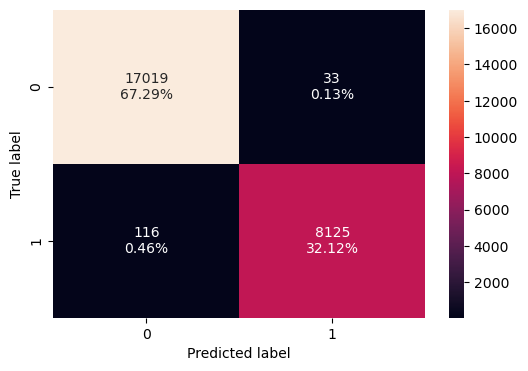

In [239]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [240]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.994109,0.985924,0.995955,0.990914


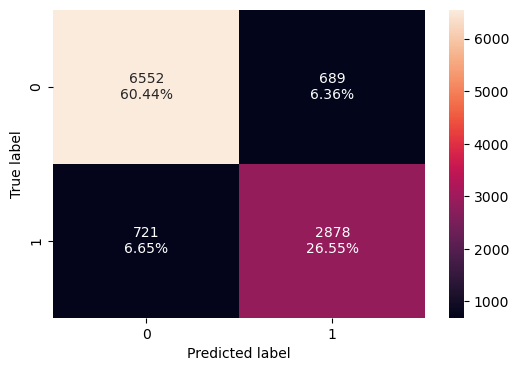

In [241]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [242]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.869926,0.799667,0.80684,0.803238


### Visualizing the Decision Tree

In [244]:
feature_names = list(X.columns)
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


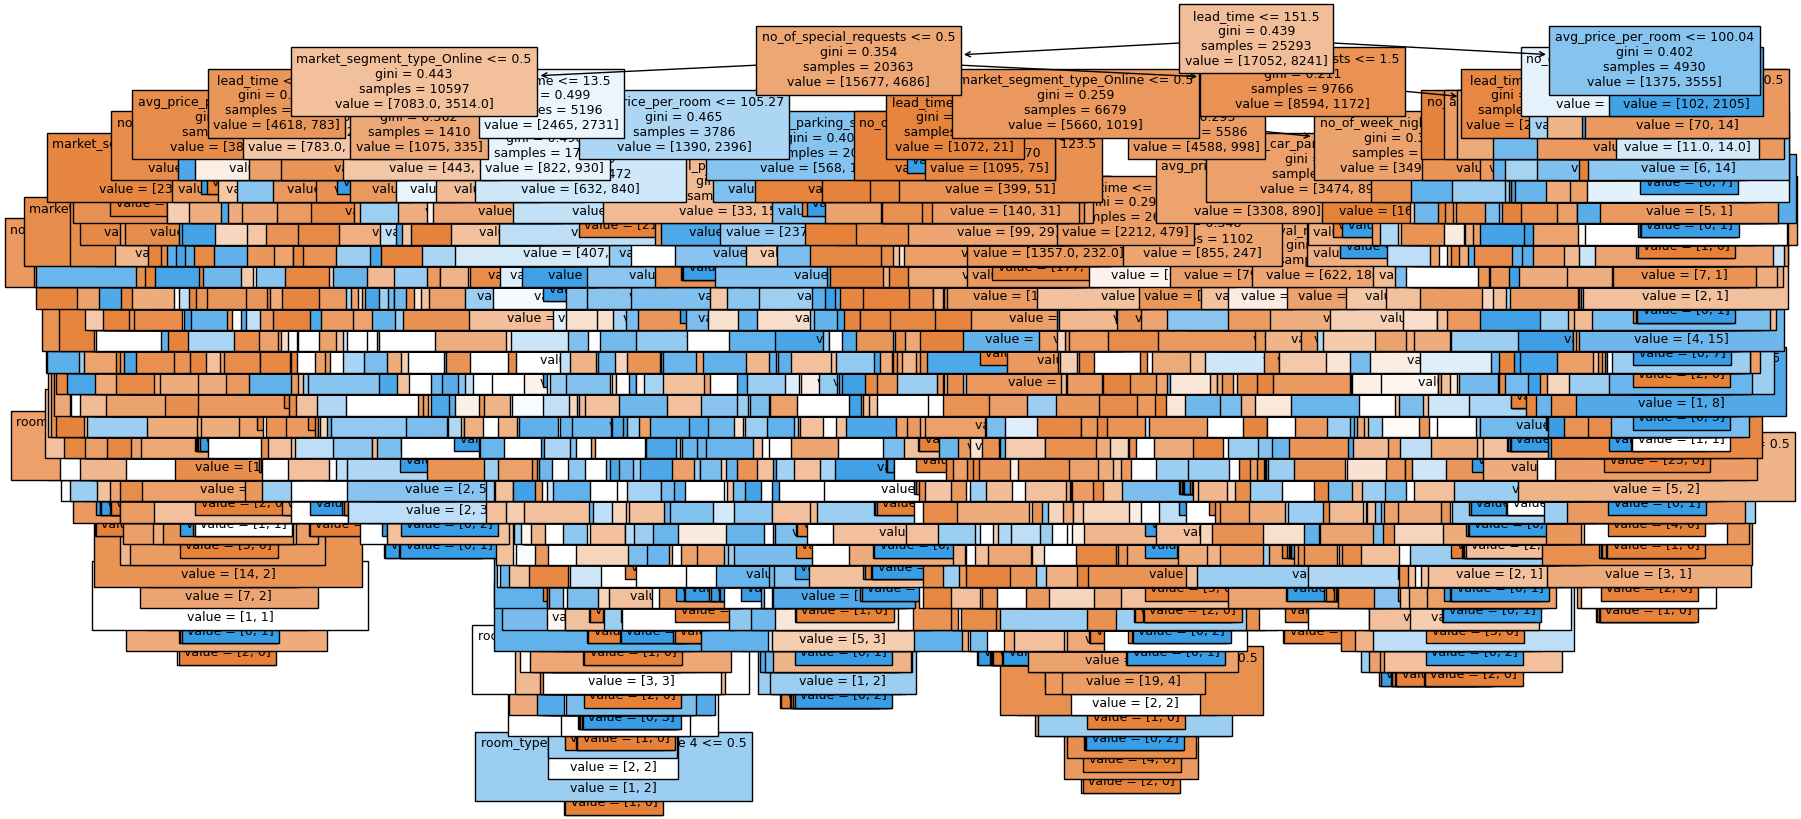

In [245]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model0,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [246]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model0, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- avg_price_per_room <= 88.50
|   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [74.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |   |   |   |--- arrival_month <= 11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 12
|   |   |   |   |   |   |   |   |   |   |--- arrival_month >  11.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [55.00, 0.00] class: 0
|   |   |   |   |   |   |   |  

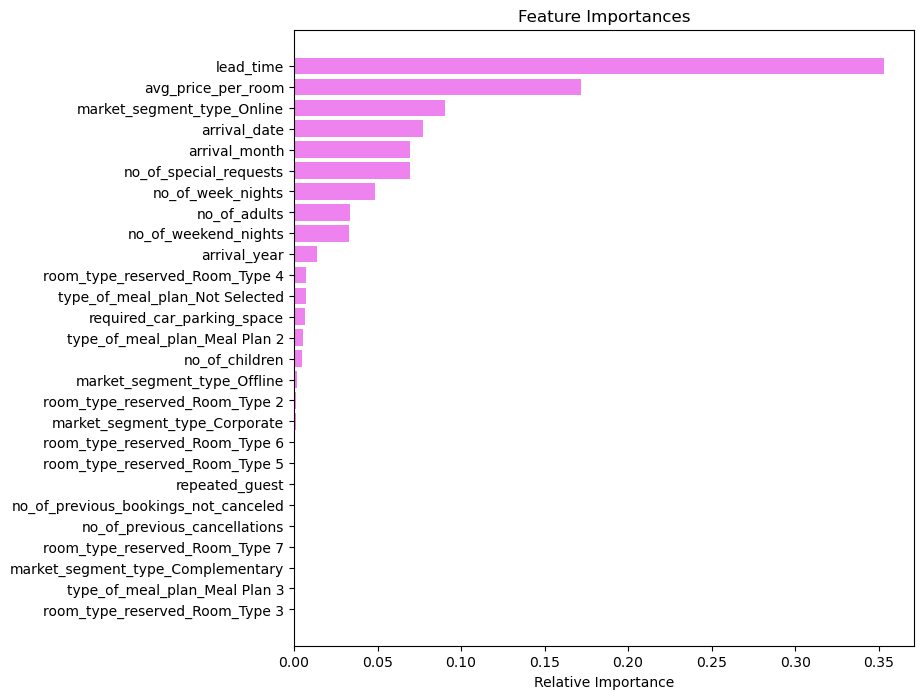

In [247]:
# importance of features in the tree building

importances = model0.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Decision Tree (Pre-pruning)

**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [250]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from

parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [10, 20, 50, 100],
    "min_samples_split": [10, 30, 50, 70],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],   
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

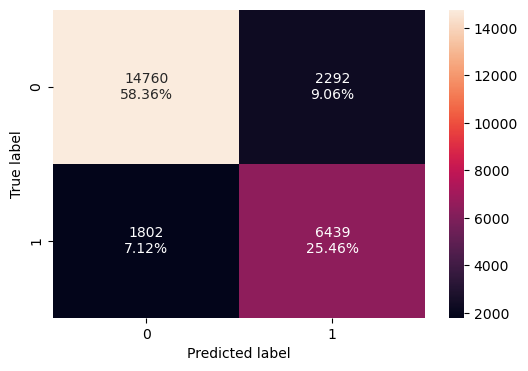

In [251]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [252]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.838137,0.781337,0.737487,0.758779


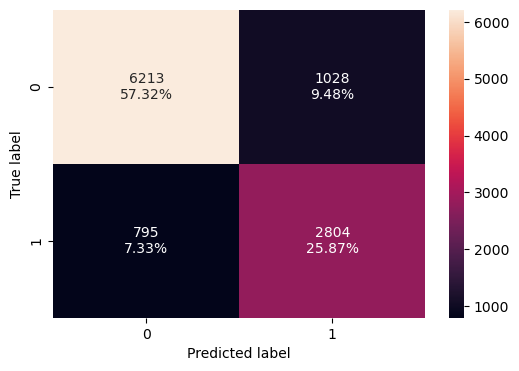

In [253]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [254]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.831827,0.779105,0.731733,0.754676


### Visualizing the Decision Tree

In [256]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

* The model is giving a generalized result now since the recall scores on both the train and test data are coming to be around 0.86 which shows that the model is able to generalize well on unseen data.

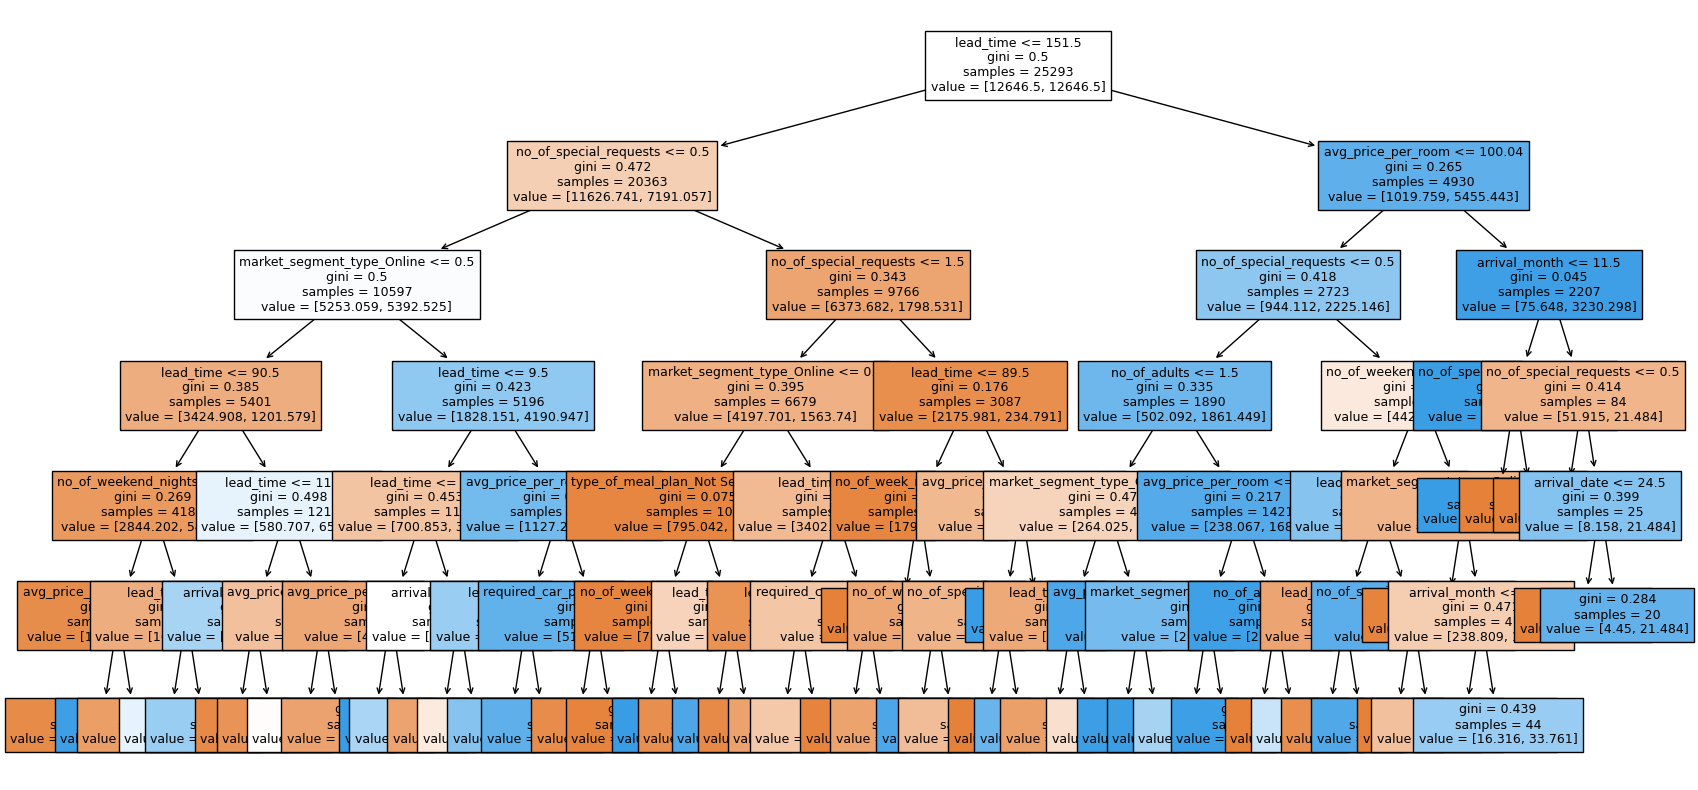

In [258]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [259]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |   |--- weights: [1772.53, 136.58] class: 0
|   |   |   |   |   |--- avg_price_per_room >  201.50
|   |   |   |   |   |   |--- weights: [0.74, 29.16] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 65.50
|   |   |   |   |   |   |--- weights: [927.05, 211.77] class: 0
|   |   |   |   |   |--- lead_time >  65.50
|   |   |   |   |   |   |--- weights: [143.88, 164.20] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- arrival_month <= 10.50
|   |   |   |   |   |   |--- weights: [247.71, 511.02] class: 1
|   |   |   |   |   |--- arrival_month >  10.50
|   |   |   |   |   |   |--- weights: [40.79, 3.07] class: 0
|  

In [260]:
importances = estimator.feature_importances_
importances

array([0.02792099, 0.        , 0.01865427, 0.00629494, 0.01153544,
       0.47269058, 0.        , 0.02294526, 0.00069693, 0.        ,
       0.        , 0.        , 0.07279409, 0.17097881, 0.        ,
       0.        , 0.00095233, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00774418, 0.18679218])

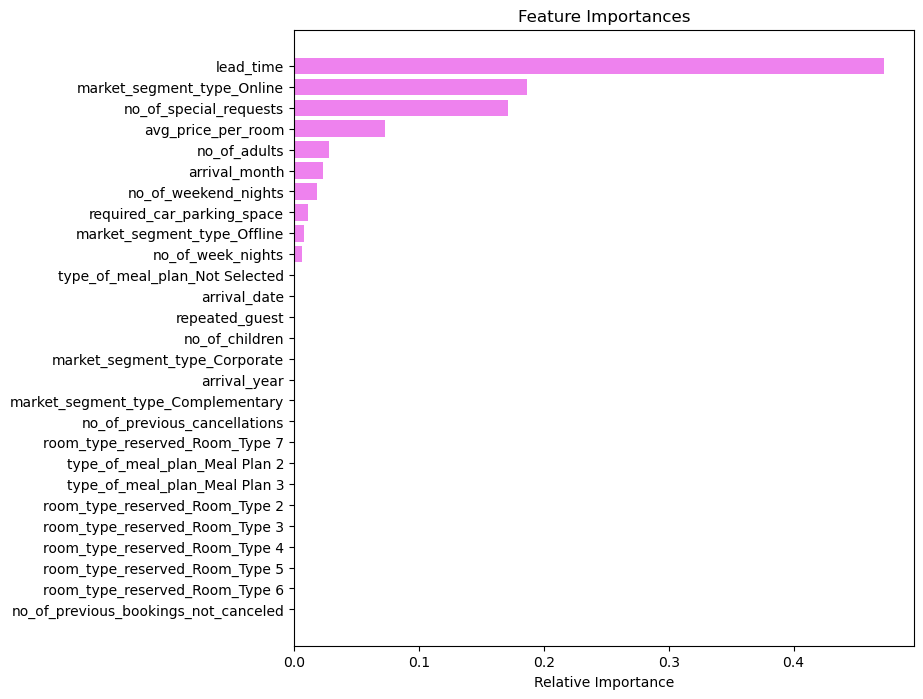

In [261]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Cost Complexity Pruning



The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

In [264]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


In [265]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.008576
1,2.604323e-20,0.008576
2,2.604323e-20,0.008576
3,2.604323e-20,0.008576
4,2.604323e-20,0.008576
...,...,...
1720,9.677002e-03,0.327326
1721,9.930481e-03,0.337256
1722,1.258597e-02,0.349842
1723,3.471084e-02,0.419264


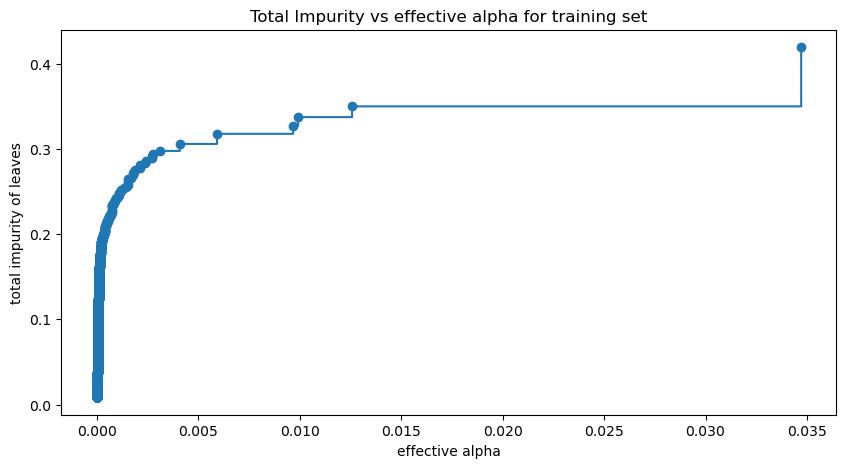

In [266]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()


Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [268]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train) 
    clfs.append(clf)

print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08073633158419125



For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

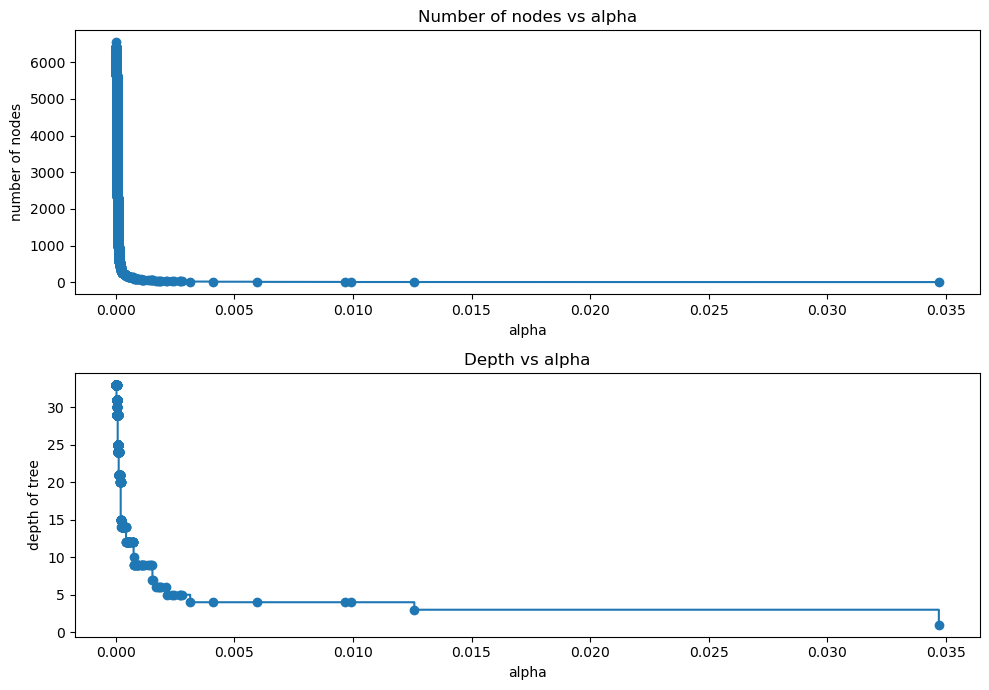

In [270]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()


#### F1 Score vs alpha for training and testing sets

In [272]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

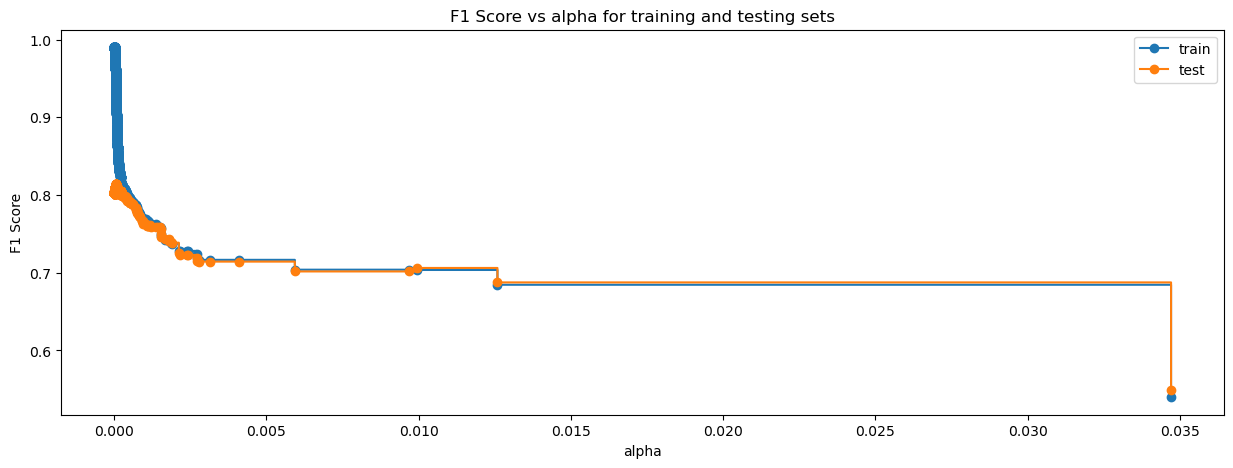

In [273]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [274]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print("Best pruned model:\n", best_model)

Best pruned model:
 DecisionTreeClassifier(ccp_alpha=6.835051072498095e-05, class_weight='balanced',
                       random_state=1)


### Checking model performance on training set

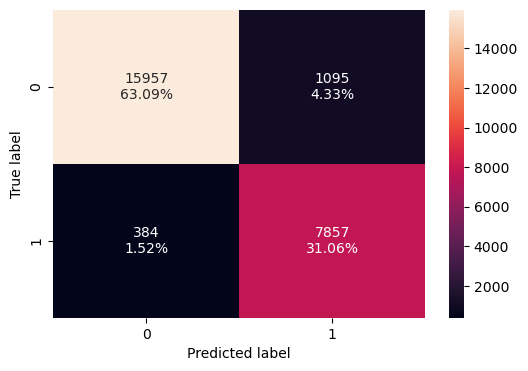

In [276]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [277]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.941525,0.953404,0.877681,0.913977


### Checking model performance on test set

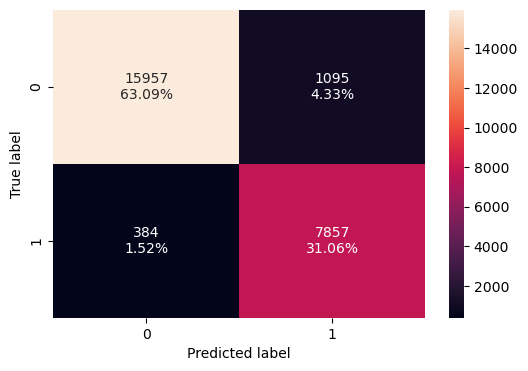

In [279]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [280]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.871771,0.846624,0.784299,0.81427


* With post-pruning we are getting good and generalized model performance on both training and test set.
* The f1 score has improved further.

### Visualizing the Decision Tree

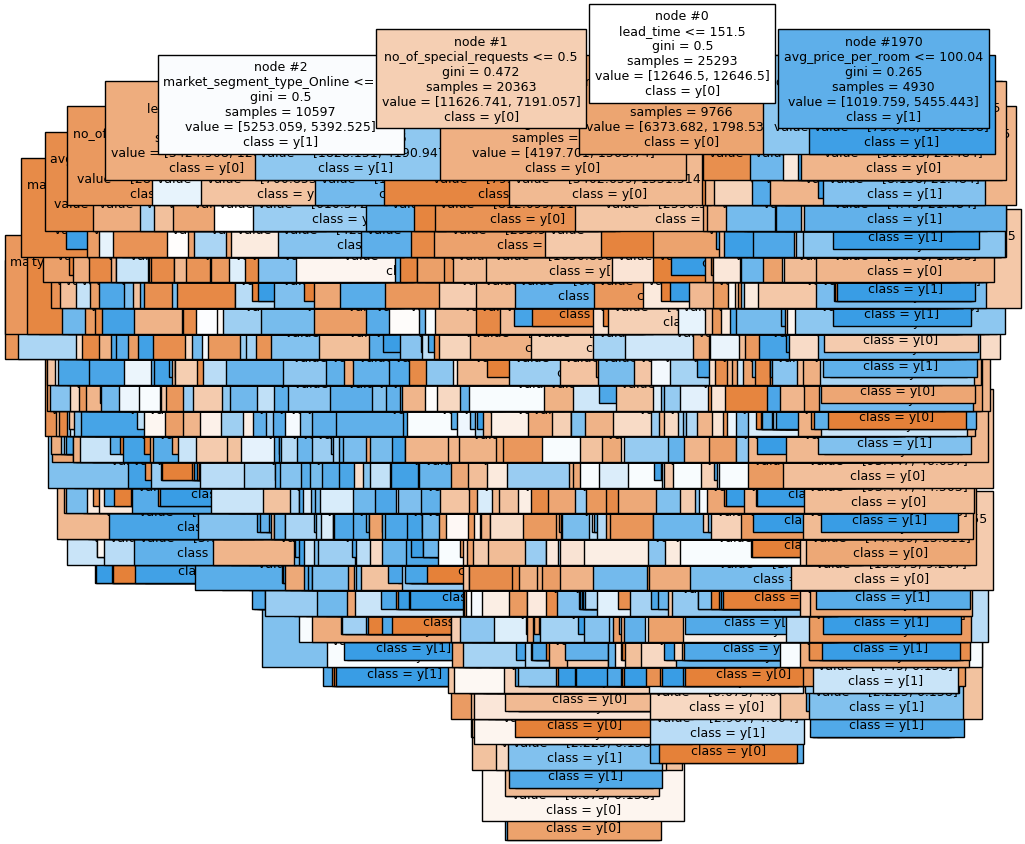

In [284]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [285]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- avg_price_per_room <= 87.25
|   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [54.88, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |   |   |   |--- arrival_month <= 11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- arrival_month >  11.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [40.79, 0.00] class: 0
|   |   |   |   |   |   |   |   

In [286]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.369777
avg_price_per_room                    0.139793
market_segment_type_Online            0.114696
no_of_special_requests                0.105753
arrival_month                         0.069031
arrival_date                          0.061318
no_of_week_nights                     0.031124
no_of_weekend_nights                  0.027429
no_of_adults                          0.024574
arrival_year                          0.015308
market_segment_type_Offline           0.011522
required_car_parking_space            0.008456
room_type_reserved_Room_Type 4        0.006509
type_of_meal_plan_Not Selected        0.004302
type_of_meal_plan_Meal Plan 2         0.003173
no_of_children                        0.002990
room_type_reserved_Room_Type 2        0.001855
room_type_reserved_Room_Type 5        0.000653
room_type_reserved_Room_Type 7        0.000630
market_segment_type_Corporate         0.000495
repeated_gues

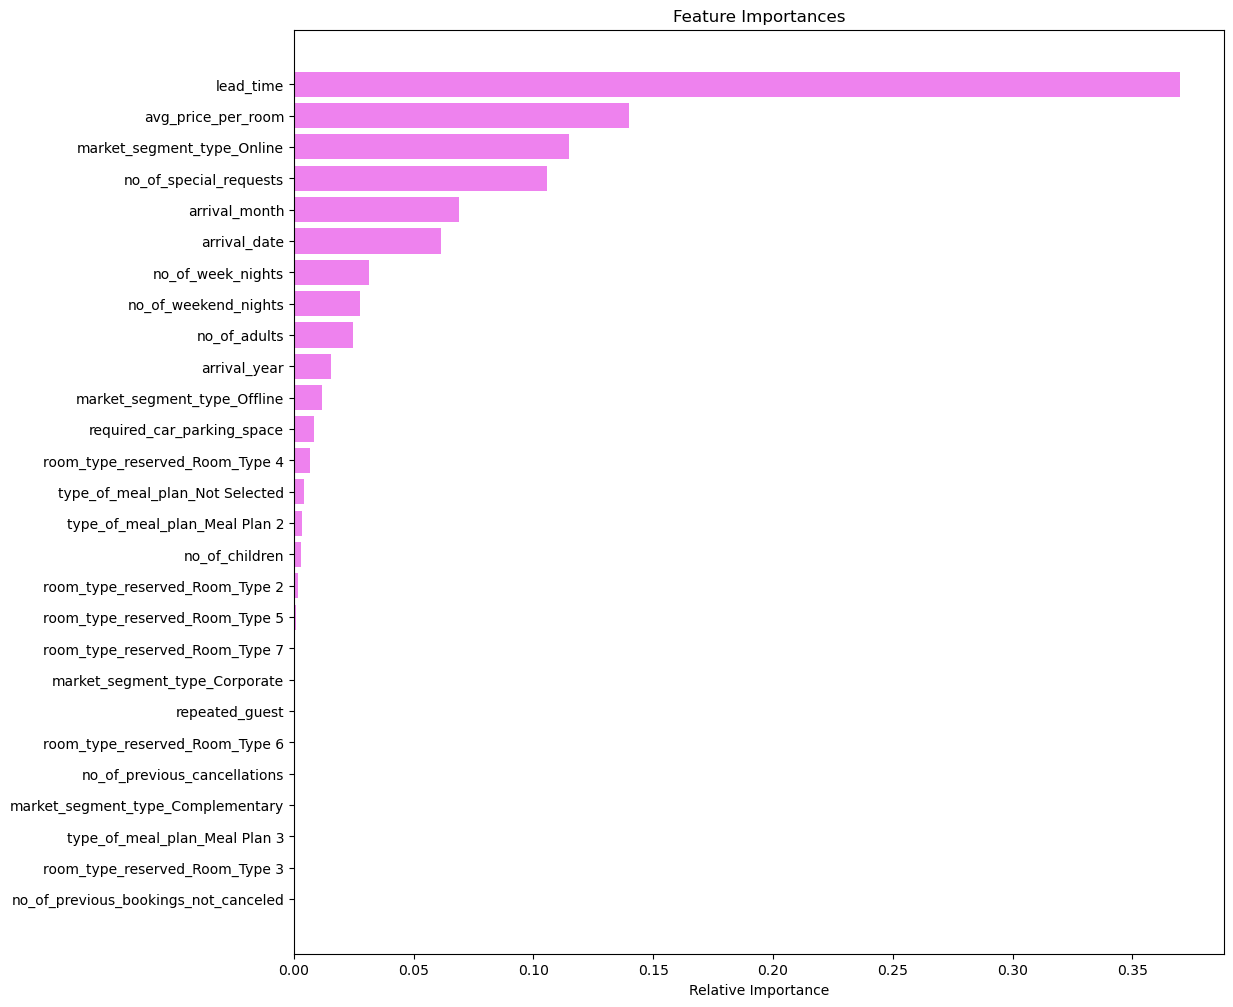

In [287]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Comparison of Models and Final Model Selection

In [288]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.994109,0.838137,0.941525
Recall,0.985924,0.781337,0.953404
Precision,0.995955,0.737487,0.877681
F1,0.990914,0.758779,0.913977


In [289]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.869926,0.831827,0.871771
Recall,0.799667,0.779105,0.846624
Precision,0.806840,0.731733,0.784299
F1,0.803238,0.754676,0.814270



# Actionable Insights and Recommendations for INN Hotels## Cancellation and Refund Policy Optimizationon

### 1. Introduce Non-Refundable Booking Options
- Guests booking early (`lead_time`) and through `Online` channels are more likely to cancel.
- **Offer discounted non-refundable rates** to secure revenue upfront and reduce cancellation risk.

### 2. Flexible Refunds for Short Lead Time Bookings
- Guests with shorter `lead_time` have lower cancellation probability.
- **Allow full or partial refunds** for bookings made less than 15 days i

### 3. Monitor and Encourage Special Requests

- Guests with **0–2 special requests** show a **higher likelihood of cancellation**, especially those with zero requests (over 40% cancellation rate).
- Conversely, guests with **3 or more requests almost never cancel**.
- **Recommendation**: 
  - Encourage guests to submit special requests during booking (e.g., preferences for room setup, amenities).
  - Use the number of requests as a **positive signal of booking commitment** rather than a cancellation risk.
  - Avoid penalizing or flagging high-request bookings—they are highly likely to show up.iple 

## Other Strategic Recommendationsic Recommendations

### 4. Optimize Online Booking Channels
- `market_segment_type_Online` is a strong predictor of cancellations.
- **Encourage direct bookings** by:
  - Offering exclusive perks or discounts via the hotel’s website.
  - Displaying clear cancellation policies during checkout.

### 5. Dynamic Pricing for High-Risk Segments
- Long `lead_time`, no `parking`, and low `avg_price_per_room` correlate with higher cancellation risk.
- **Raise prices or require partial prepayment** for bookings matching this profile.

### 6. Targeted Offers for Reliable Segments
- Guests with short `lead_time` and fewer requests are more likely to show up.
- **Incentivize** these custo
## Model Insights
- **Pre-Pruned Decision Tree** performed best: F1 train - 0.758779, F1 test - 0.754676	
- **Post-Pruned Decision Tree** model looks overfitted: F1 train - 0.913977, F1 test - 0.814270

- **Top Features Contributing to Predictions**:
  1. `lead_time`
  2. `market_segment_type_Online`
  3. `no_of_special_requests`
  4. `avg_price_per_room` should inform policy design and marketing strategy.

